In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read in weekly financial data
data = pd.read_csv('US_S&P500_with_metrics.csv', index_col = False)


C:\Users\zliu2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows',200)
data.tail(1)

Date Symbol        Name      Sector  \
130748  7/8/19    ZTS  Zoetis Inc  Healthcare   

                                        Industry  Adjusted_close     Volume  \
130748  Drug Manufacturers - Specialty & Generic         114.185  7341000.0   

        accountsPayable  accumulatedOtherComprehensiveIncome  \
130748      235000000.0                         -619000000.0   

        additionalPaidInCapital          cash  commonStock  \
130748             1.010000e+09  1.728000e+09    5000000.0   

        commonStockTotalEquity  deferredLongTermLiab      goodWill  \
130748               5000000.0                   NaN  2.522000e+09   

        intangibleAssets     inventory  longTermDebt  longTermInvestments  \
130748      1.989000e+09  1.361000e+09  6.578000e+09            2000000.0   

        netReceivables  netTangibleAssets  \
130748     970000000.0      -2.194000e+09   

        noncontrollingInterestInConsolidatedEntity  otherAssets  \
130748                                         NaN  152000000.0   

        otherCurrentAssets  otherCurrentLiab    otherLiab  \
130748         248000000.0       179000000.0  906000000.0   

        otherStockholderEquity  preferredStockTotalEquity  \
130748            -598000000.0                        NaN   

        propertyPlantEquipment  retainedEarnings  retainedEarningsTotalEquity  \
130748            1.841000e+09      3.495000e+09                 3.067000e+09   

        shortLongTermDebt  shortTermInvestments  \
130748         33000000.0            65000000.0   

        temporaryEquityRedeemableNoncontrollingInterests   totalAssets  \
130748                                               NaN  1.088300e+10   

        totalCurrentAssets  totalCurrentLiabilities     totalLiab  \
130748        4.379000e+09             1.082000e+09  8.566000e+09   

        totalPermanentEquity  totalStockholderEquity  treasuryStock  \
130748          2.118000e+09            2.317000e+09   1.345000e+09   

        sharesMln  capitalExpenditures  changeInCash  \
130748      483.0           63000000.0   126000000.0   

        changeToAccountReceivables  changeToInventory  changeToLiabilities  \
130748                  75000000.0         17000000.0          -79000000.0   

        changeToNetincome  changeToOperatingActivities  depreciation  \
130748         18000000.0                  -52000000.0    98000000.0   

        dividendsPaid  investments  netBorrowings  \
130748    -79000000.0   36000000.0     -9000000.0   

        otherCashflowsFromFinancingActivities  \
130748                             -8000000.0   

        otherCashflowsFromInvestingActivities  salePurchaseOfStock  \
130748                              4000000.0                  0.0   

        totalCashFromFinancingActivities  totalCashFromOperatingActivities  \
130748                      -243000000.0                       389000000.0   

        totalCashflowsFromInvestingActivities  costOfRevenue  \
130748                            -23000000.0    516000000.0   

        discontinuedOperations         ebit  effectOfAccountingCharges  \
130748                     0.0  430000000.0                        0.0   

        extraordinaryItems  grossProfit  incomeBeforeTax  incomeTaxExpense  \
130748                 0.0  939000000.0      381000000.0        69000000.0   

        interestExpense  minorityInterest    netIncome  \
130748      -56000000.0               0.0  312000000.0   

        netIncomeApplicableToCommonShares  netIncomeFromContinuingOps  \
130748                        312000000.0                 312000000.0   

        nonRecurring  operatingIncome  otherItems  otherOperatingExpenses  \
130748           0.0      430000000.0         0.0                     0.0   

        researchDevelopment  sellingGeneralAdministrative  \
130748          102000000.0                   369000000.0   

        totalOperatingExpenses  totalOtherIncomeExpenseNet  totalRevenue  \
130748            1.025000e+09                 -49000000.0  1

## Data cleaning

In [4]:
print(data.shape)
print(data.size)

(130749, 102)
13336398


In [5]:
#Checking columns with the highest pecentages of missing values
null_list = data.isnull().sum() / len(data) 
null_list[null_list > 0.2]

accumulatedOtherComprehensiveIncome                 0.392355
additionalPaidInCapital                             0.426420
commonStockTotalEquity                              0.446252
deferredLongTermLiab                                0.539339
noncontrollingInterestInConsolidatedEntity          0.892726
preferredStockTotalEquity                           0.713114
retainedEarningsTotalEquity                         0.408386
shortTermInvestments                                0.244400
temporaryEquityRedeemableNoncontrollingInterests    0.892726
totalPermanentEquity                                0.388263
treasuryStock                                       0.301738
dtype: float64

In [6]:
#One roll in data is a wrong entry, therefore deleting and reset index 
data = data[data['Symbol'] != '1/16/18']
data.reset_index(inplace=True, drop=True) 
data.iloc[54079,0] = '1/16/18'
#'epsCalculated' has wrong string '#NAME?', therefore replacing with NaN
data.replace(to_replace=['#NAME?'], value=np.nan, inplace=True)
#Converting everything from 'Adjusted_Close' to float type
data.iloc[:,5:101] = data.iloc[:,5:101].apply(pd.to_numeric)
#Certain rows has inf value, therefore replacing with nan
data = data.replace([np.inf, -np.inf], np.nan)
#replacing all 0s with nan
data.replace(0, value=np.nan, inplace=True)
#Dropping column of 'effectOfAccountingCharges' since it's just 0 and blanks
data = data.dropna(axis=1, how='all')

In [7]:
data = data.iloc[:,0:5].join(np.log(data.iloc[:,5:101]))

C:\Users\zliu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [11]:
data = data.dropna(axis=1, how='all')

## Metric Histogram Visualization

#### Automating the histogram per Metric

In [13]:
#Defining a graph function that generates six histogram plots 
def graph(nlist):
    figs={}
    axs={}
    for idx,plot in enumerate(nlist):
        figs[idx]=plt.figure(figsize=(13,11))
        
        axs[idx]=figs[idx].add_subplot(231)
        axs[idx].hist(data.iloc[:,plot][pd.notnull(data.iloc[:,plot])], bins = 20, facecolor='blue')
        plt.xlabel(data.columns.values[plot])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(232)
        axs[idx].hist(data.iloc[:,plot+1][pd.notnull(data.iloc[:,plot+1])], bins = 20, facecolor='orange')
        plt.xlabel(data.columns.values[plot+1])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(233)
        axs[idx].hist(data.iloc[:,plot+2][pd.notnull(data.iloc[:,plot+2])], bins = 20, facecolor='green')
        plt.xlabel(data.columns.values[plot+2])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(234)
        axs[idx].hist(data.iloc[:,plot+3][pd.notnull(data.iloc[:,plot+3])], bins = 20, facecolor='red')
        plt.xlabel(data.columns.values[plot+3])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(235)
        axs[idx].hist(data.iloc[:,plot+4][pd.notnull(data.iloc[:,plot+4])], bins = 20, facecolor='purple')
        plt.xlabel(data.columns.values[plot+4])
        plt.ylabel('Frequency')
        
        axs[idx]=figs[idx].add_subplot(236)
        axs[idx].hist(data.iloc[:,plot+5][pd.notnull(data.iloc[:,plot+5])], bins = 50, facecolor='brown')
        plt.xlabel(data.columns.values[plot+5])
        plt.ylabel('Frequency')

        plt.suptitle("S&P 500 Stock Feature Histograms")

    return figs,axs

In [14]:
np.arange(5,99,6) # a set of indexes gapped by 6, just to see which points we should enter. 101 is not included in here

array([ 5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95])

IndexError: single positional indexer is out-of-bounds

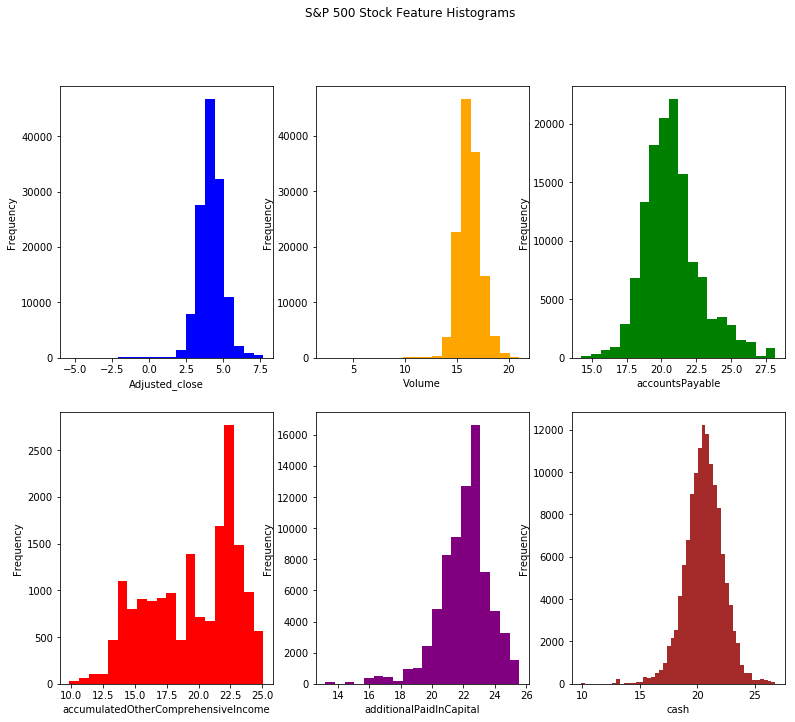

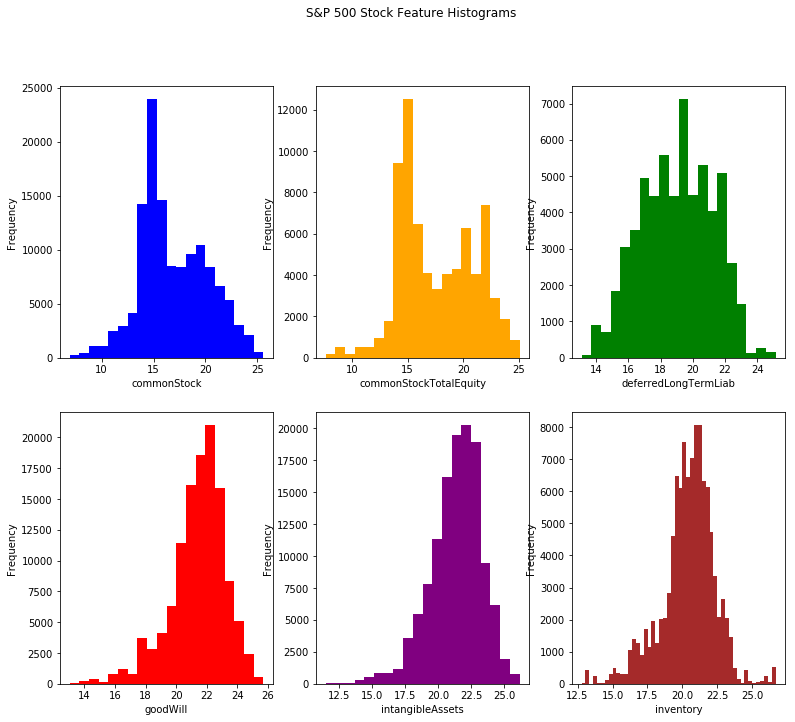

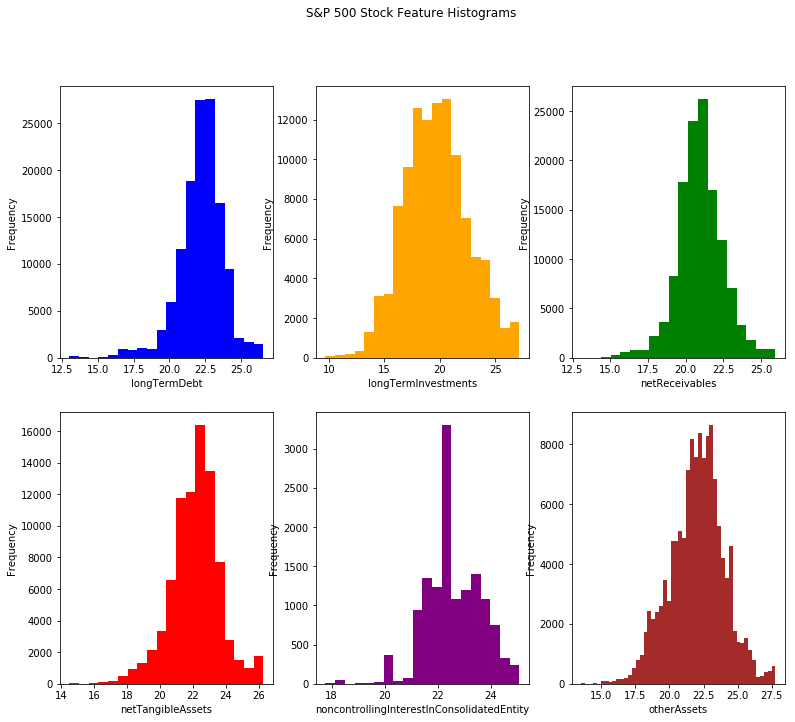

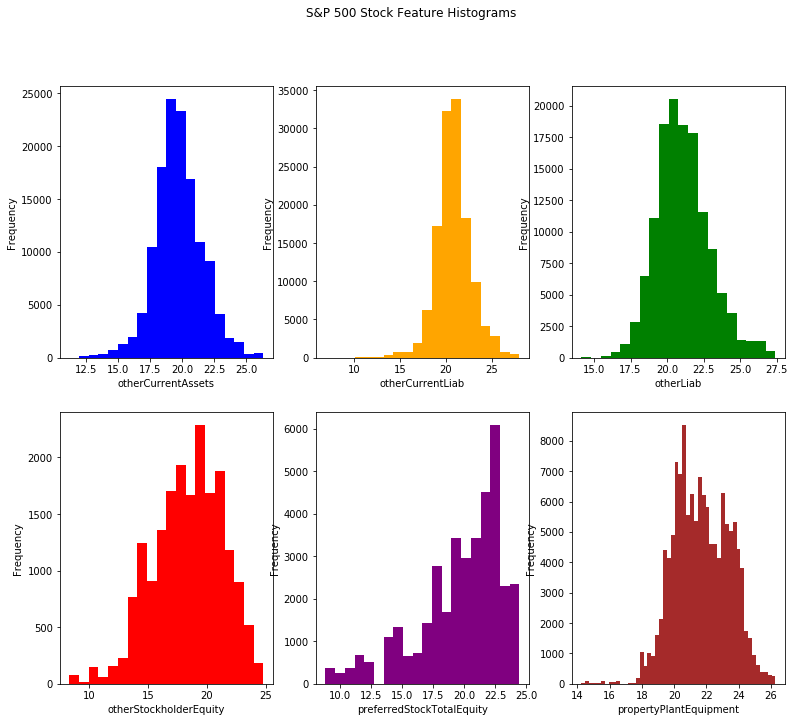

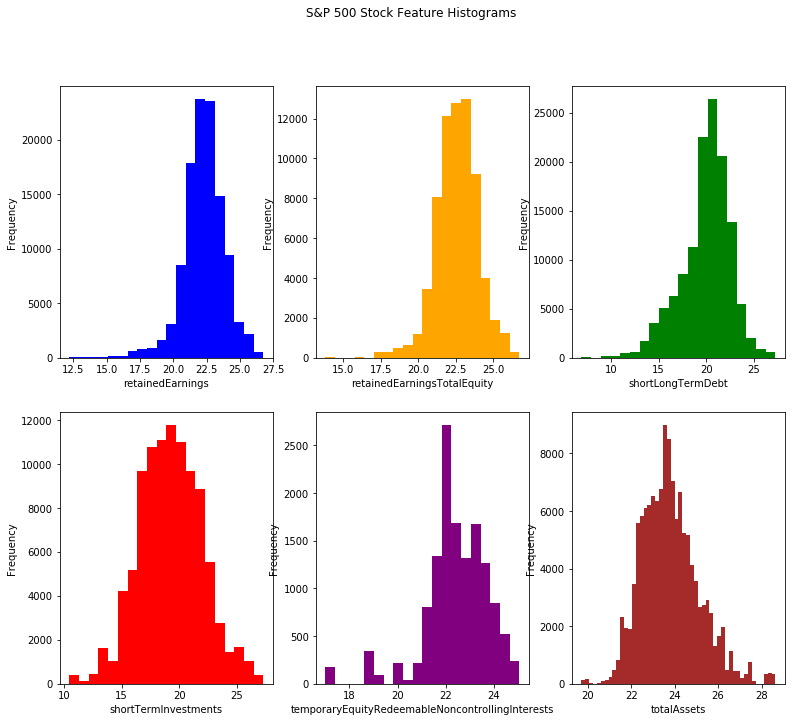

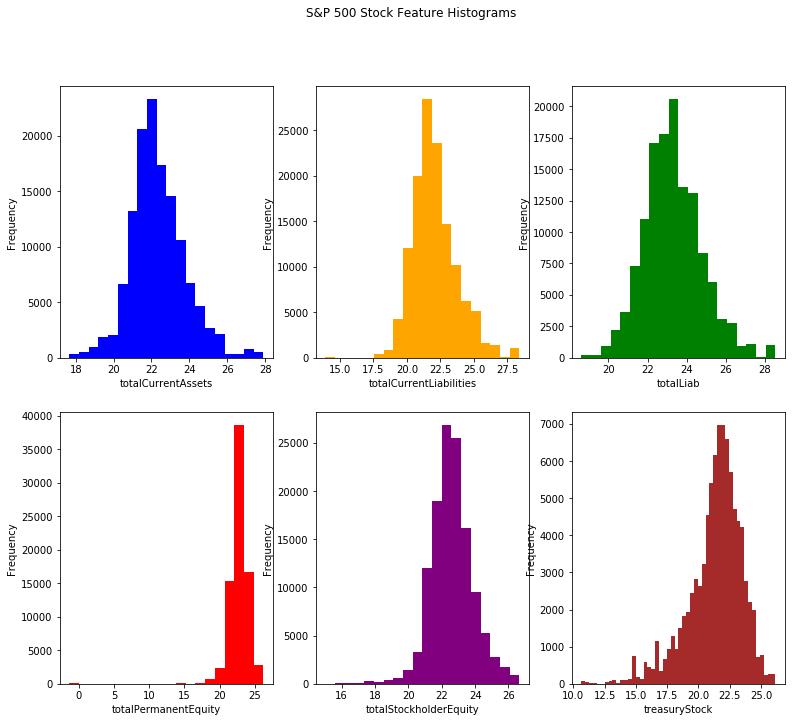

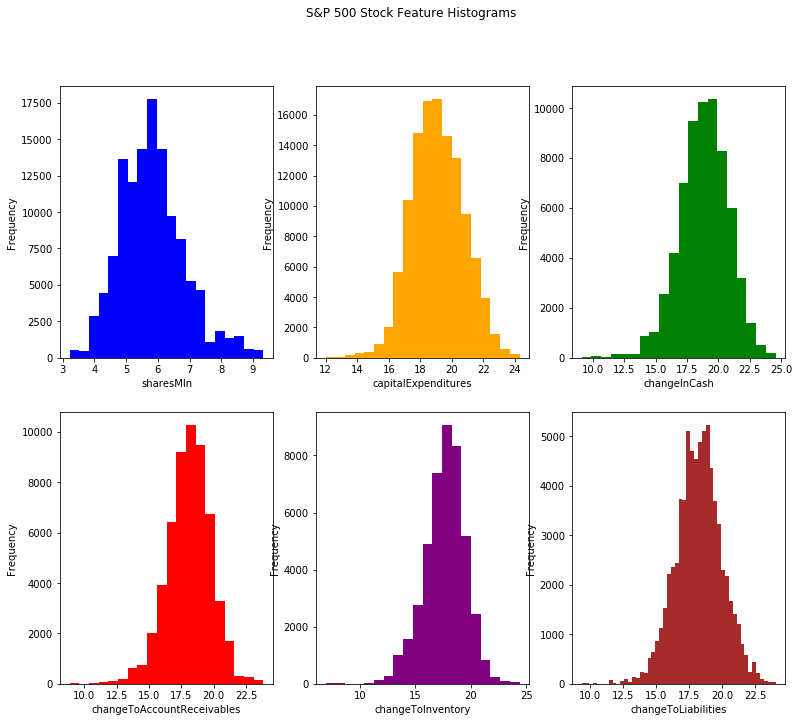

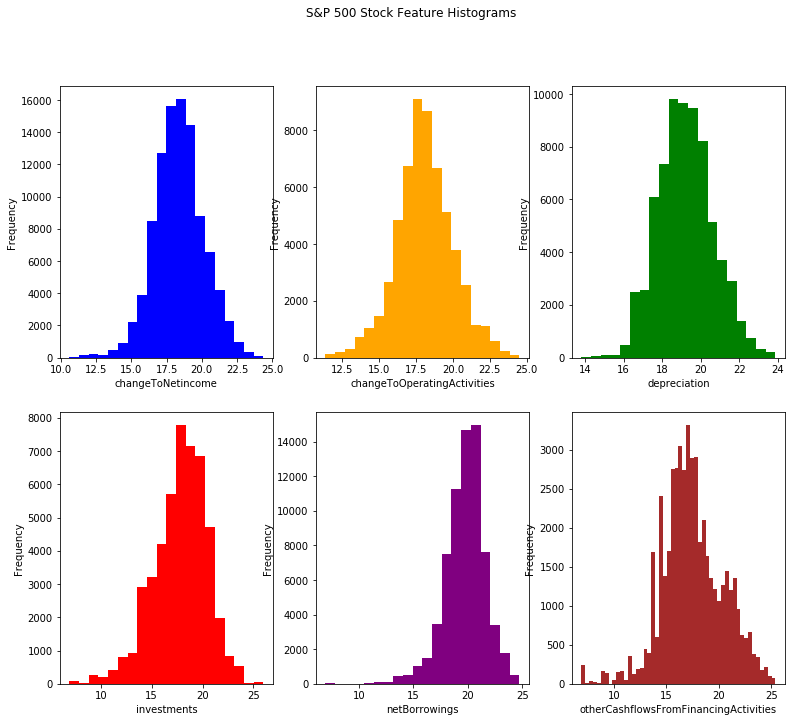

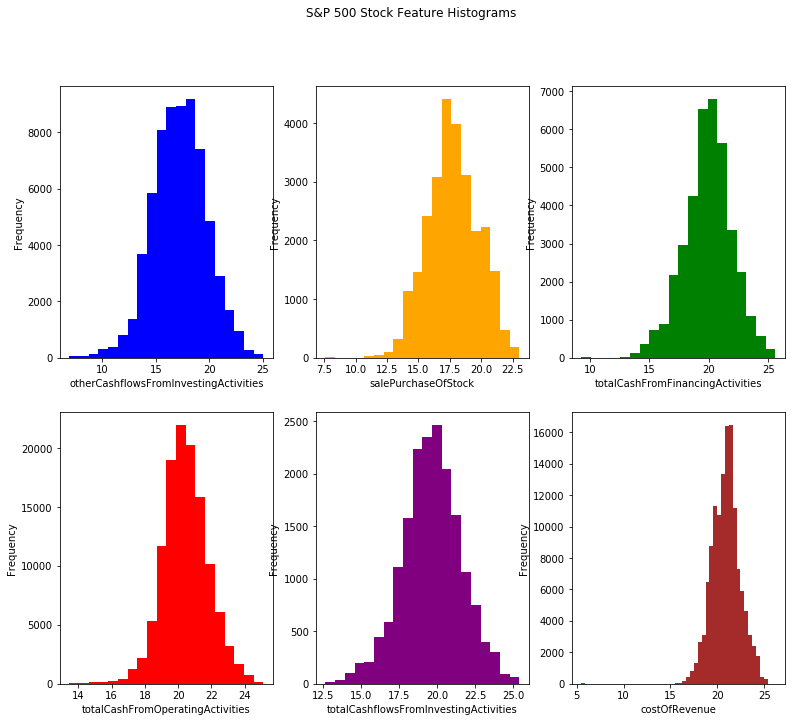

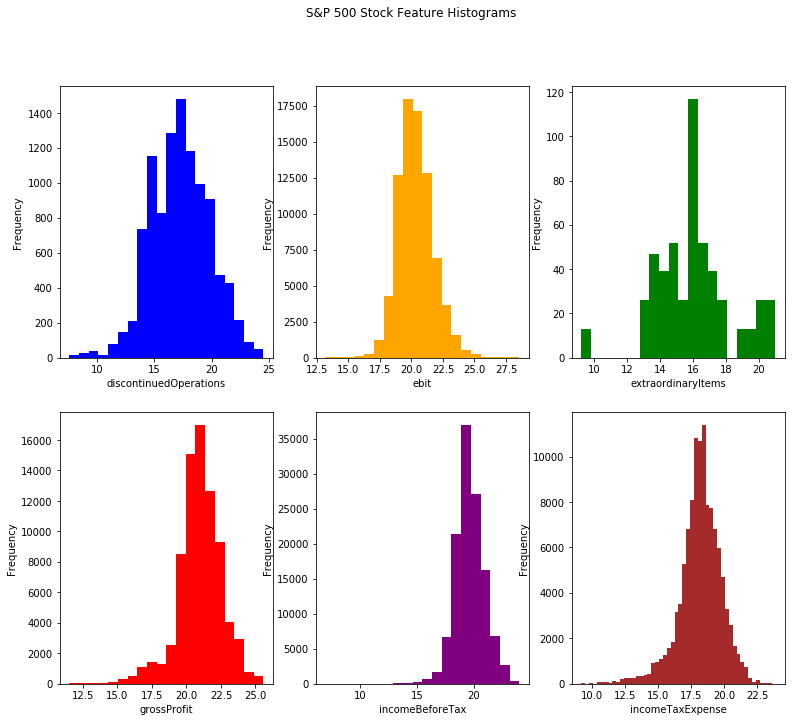

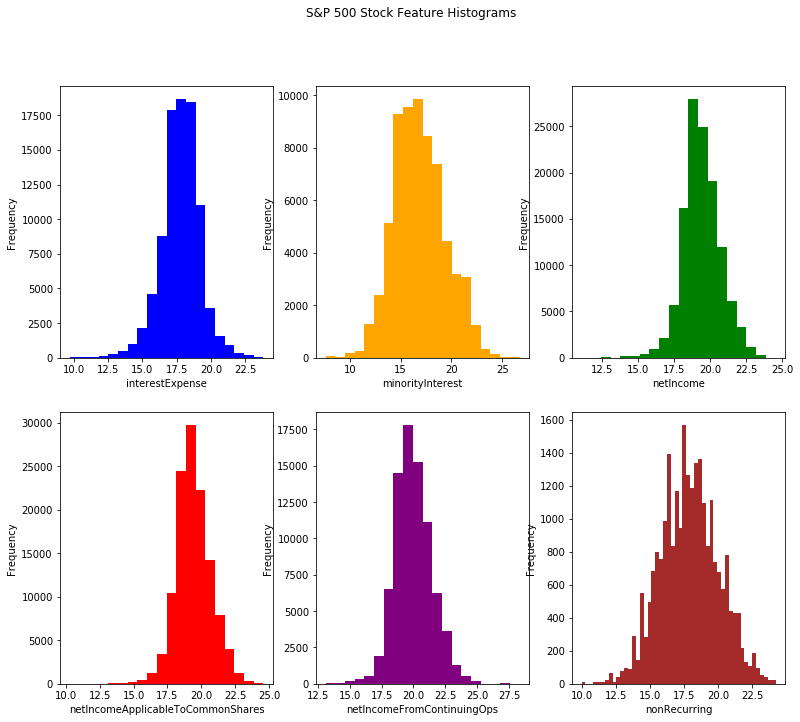

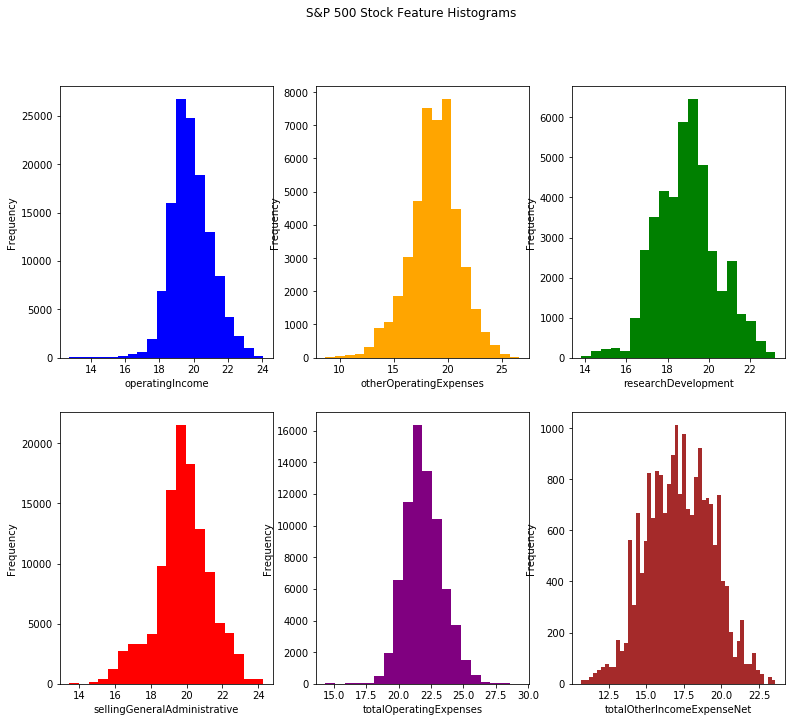

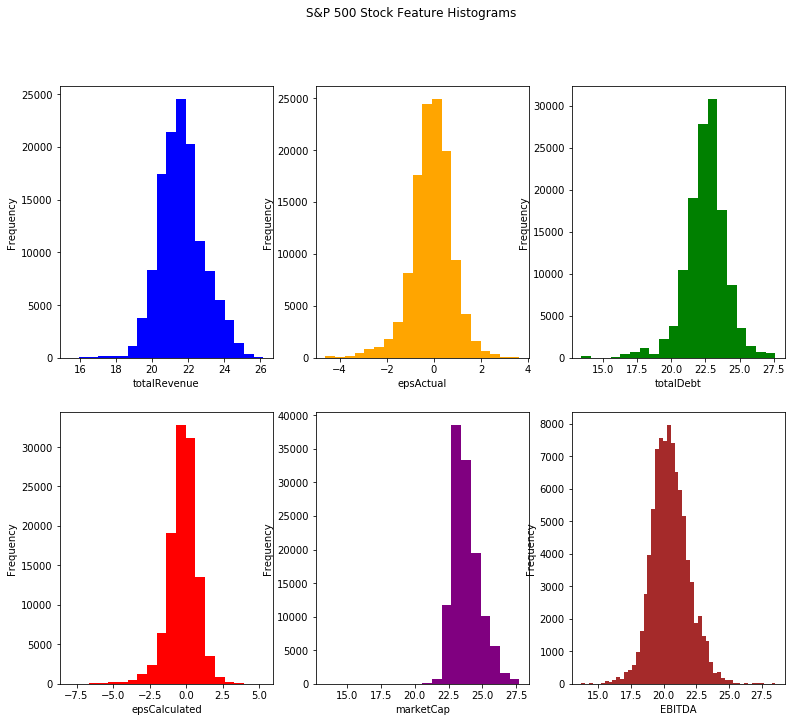

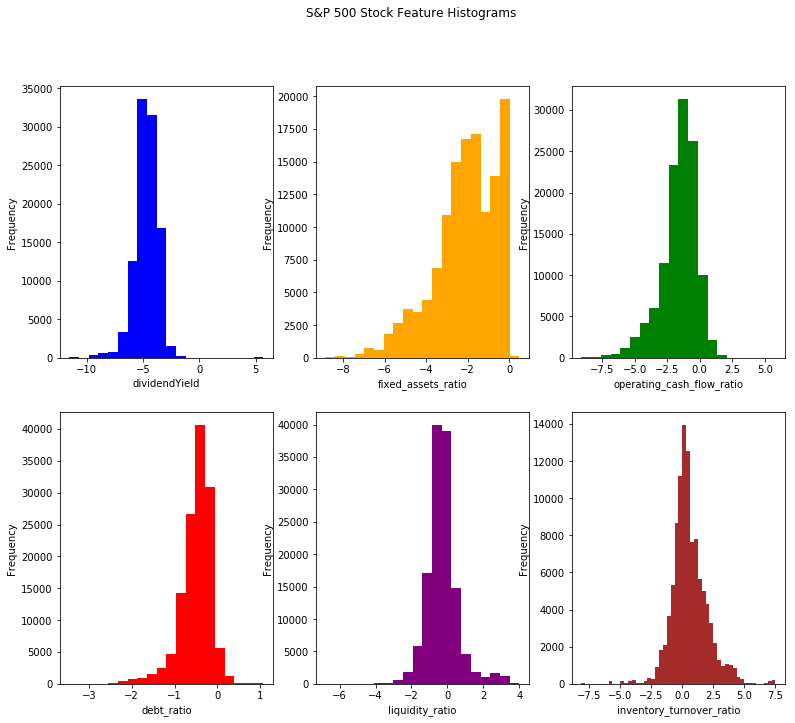

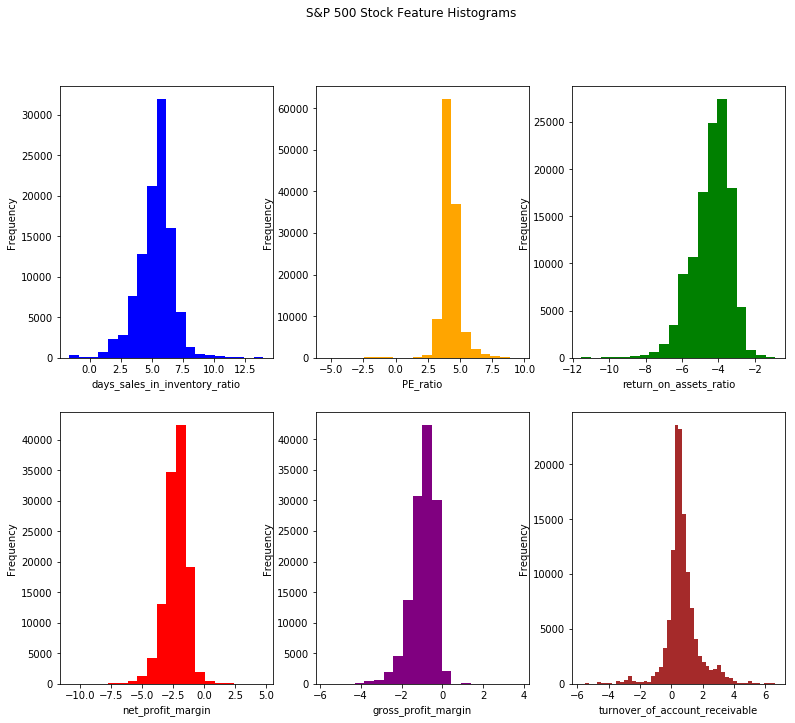

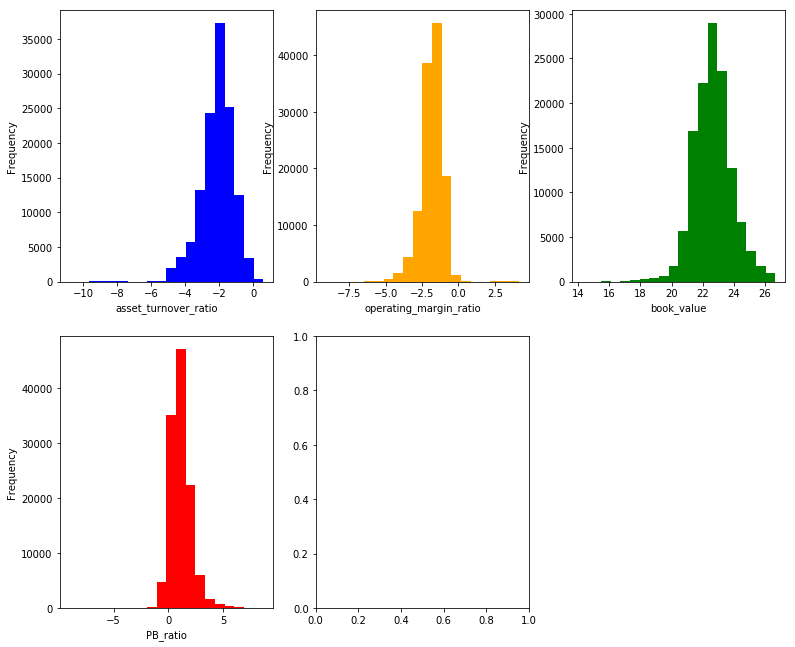

In [15]:
# Generate a list with the corresponding location of the plot
graph(np.arange(5,96,6))

## Sector-wise Histogram Visualization

#### Defining the Sectors

In [16]:
#Checking unique sectors 
data.groupby('Sector')['Symbol'].nunique() 

Sector
Basic Materials           17
Communication Services     7
Consumer Cyclical         78
Consumer Defensive        36
Energy                    29
Financial Services        70
Healthcare                58
Industrials               70
Other                     20
Real Estate               31
Technology                62
Utilities                 27
Name: Symbol, dtype: int64

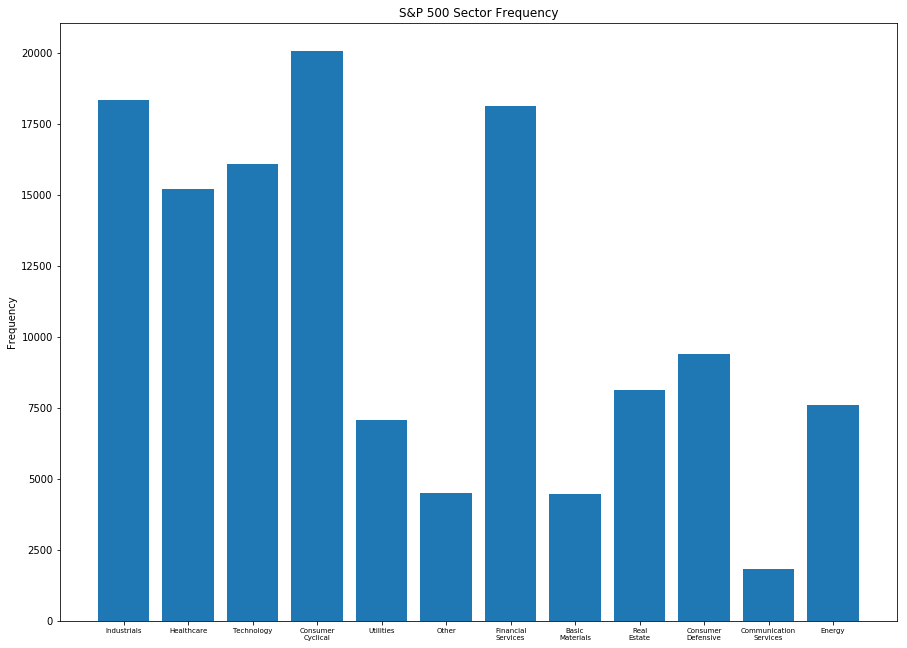

In [17]:
# Create a dictionary of how often a sector appears
sector_freq = {}
for i in range(len(data)):
    sector = data.iloc[i].loc['Sector']
    if sector in list(sector_freq.keys()):
        sector_freq[sector] += 1
    else:
        sector_freq[sector] = 1
        
# Plot frequencies of sectors
x = list(sector_freq.keys())
y = list(sector_freq.values())
for i in range(len(x)):
    x[i] = x[i].replace(' ','\n')
plt.figure(3,figsize=(15,11))
plt.rc('xtick', labelsize = 7)
plt.bar(x, y)
plt.ylabel('Frequency')
plt.title('S&P 500 Sector Frequency')

# Separate data by sector
data_Materials = data[data.loc[:,'Sector']=='Basic Materials'].dropna(how='all')
data_Real_Estate = data[data.loc[:,'Sector']=='Real Estate'].dropna(how='all')
data_Utilities = data[data.loc[:,'Sector']=='Utilities'].dropna(how='all')
data_Telecom = data[data.loc[:,'Sector']=='Communication Services'].dropna(how='all')
data_Cyclical = data[data.loc[:,'Sector']=='Consumer Cyclical'].dropna(how='all')
data_Industrials = data[data.loc[:,'Sector']=='Industrials'].dropna(how='all')
data_Tech = data[data.loc[:,'Sector']=='Technology'].dropna(how='all')
data_Health_Care = data[data.loc[:,'Sector']=='Healthcare'].dropna(how='all')
data_Energy = data[data.loc[:,'Sector']=='Energy'].dropna(how='all')
data_Defensive = data[data.loc[:,'Sector']=='Consumer Defensive'].dropna(how='all')
data_Financials = data[data.loc[:,'Sector']=='Financial Services'].dropna(how='all')
data_Other = data[data.loc[:,'Sector']=='Other'].dropna(how='all')

# Plot feature histogram by sector
colors = ['cyan', 'magenta', 'royalblue', 'darksalmon', 'green', 'blue', 'orange', 'red', 'purple', 'brown', 'grey','yellow']
labels = ['Basic Materials', 'Real Estate','Utilities', 'Communication Services', 'Consumer Cyclical', 'Industrials', 
          'Technology', 'Healthcare', 'Energy','Consumer Defensive',  'Financial Services', 'Other']

def organize_feature_by_sector(feature):
    feature_by_sector = [data_Materials[feature][pd.notnull(data_Materials[feature])], 
        data_Real_Estate[feature][pd.notnull(data_Real_Estate[feature])], 
        data_Cyclical[feature][pd.notnull(data_Cyclical[feature])], 
        data_Industrials[feature][pd.notnull(data_Industrials[feature])],
        data_Tech[feature][pd.notnull(data_Tech[feature])],
        data_Health_Care[feature][pd.notnull(data_Health_Care[feature])],
        data_Energy[feature][pd.notnull(data_Energy[feature])],
        data_Defensive[feature][pd.notnull(data_Defensive[feature])],
        data_Financials[feature][pd.notnull(data_Financials[feature])],
        data_Utilities[feature][pd.notnull(data_Utilities[feature])],
        data_Telecom[feature][pd.notnull(data_Telecom[feature])],
        data_Other[feature][pd.notnull(data_Other[feature])]]

    return feature_by_sector

#### Automating the sector-wise plotting 

In [19]:
#Defining a graph function that generates stacked sector-wise histogram
def s_graph(nlist):
    figs={}
    axs={}
    for idx,plot in enumerate(nlist):
        figs[idx]=plt.figure(figsize=(13,12))
        axs[idx]=figs[idx].add_subplot(111)
        axs[idx].hist(organize_feature_by_sector(data.columns.values[plot]), bins = 30, 
                      histtype = 'bar', stacked = True, color = colors, label = labels)
        plt.title(data.columns.values[plot] + ' ' + 'Histogram by Sector')
        plt.xlabel(data.columns.values[plot])
        plt.ylabel('Frequency')
        plt.legend(loc = 'upper right')

    return figs, axs


In [18]:
data.columns.values

array(['Date', 'Symbol', 'Name', 'Sector', 'Industry', 'Adjusted_close',
       'Volume', 'accountsPayable', 'accumulatedOtherComprehensiveIncome',
       'additionalPaidInCapital', 'cash', 'commonStock',
       'commonStockTotalEquity', 'deferredLongTermLiab', 'goodWill',
       'intangibleAssets', 'inventory', 'longTermDebt',
       'longTermInvestments', 'netReceivables', 'netTangibleAssets',
       'noncontrollingInterestInConsolidatedEntity', 'otherAssets',
       'otherCurrentAssets', 'otherCurrentLiab', 'otherLiab',
       'otherStockholderEquity', 'preferredStockTotalEquity',
       'propertyPlantEquipment', 'retainedEarnings',
       'retainedEarningsTotalEquity', 'shortLongTermDebt',
       'shortTermInvestments',
       'temporaryEquityRedeemableNoncontrollingInterests', 'totalAssets',
       'totalCurrentAssets', 'totalCurrentLiabilities', 'totalLiab',
       'totalPermanentEquity', 'totalStockholderEquity', 'treasuryStock',
       'sharesMln', 'capitalExpenditures', 'chang

C:\Users\zliu2\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


({0: <Figure size 936x864 with 1 Axes>,
  1: <Figure size 936x864 with 1 Axes>,
  2: <Figure size 936x864 with 1 Axes>,
  3: <Figure size 936x864 with 1 Axes>,
  4: <Figure size 936x864 with 1 Axes>,
  5: <Figure size 936x864 with 1 Axes>,
  6: <Figure size 936x864 with 1 Axes>,
  7: <Figure size 936x864 with 1 Axes>,
  8: <Figure size 936x864 with 1 Axes>,
  9: <Figure size 936x864 with 1 Axes>,
  10: <Figure size 936x864 with 1 Axes>,
  11: <Figure size 936x864 with 1 Axes>,
  12: <Figure size 936x864 with 1 Axes>,
  13: <Figure size 936x864 with 1 Axes>,
  14: <Figure size 936x864 with 1 Axes>,
  15: <Figure size 936x864 with 1 Axes>,
  16: <Figure size 936x864 with 1 Axes>,
  17: <Figure size 936x864 with 1 Axes>,
  18: <Figure size 936x864 with 1 Axes>,
  19: <Figure size 936x864 with 1 Axes>,
  20: <Figure size 936x864 with 1 Axes>,
  21: <Figure size 936x864 with 1 Axes>,
  22: <Figure size 936x864 with 1 Axes>,
  23: <Figure size 936x864 with 1 Axes>,
  24: <Figure size 936x864

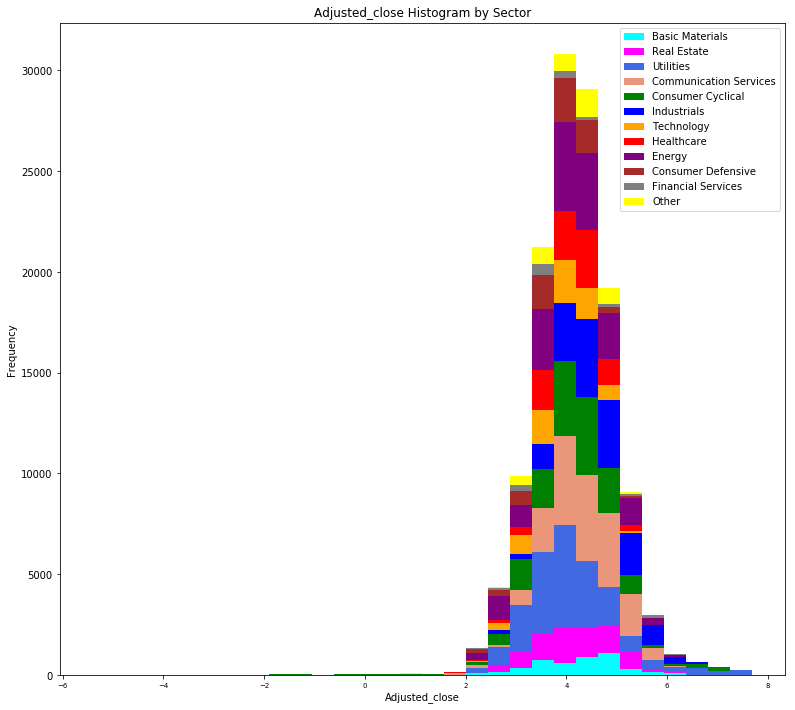

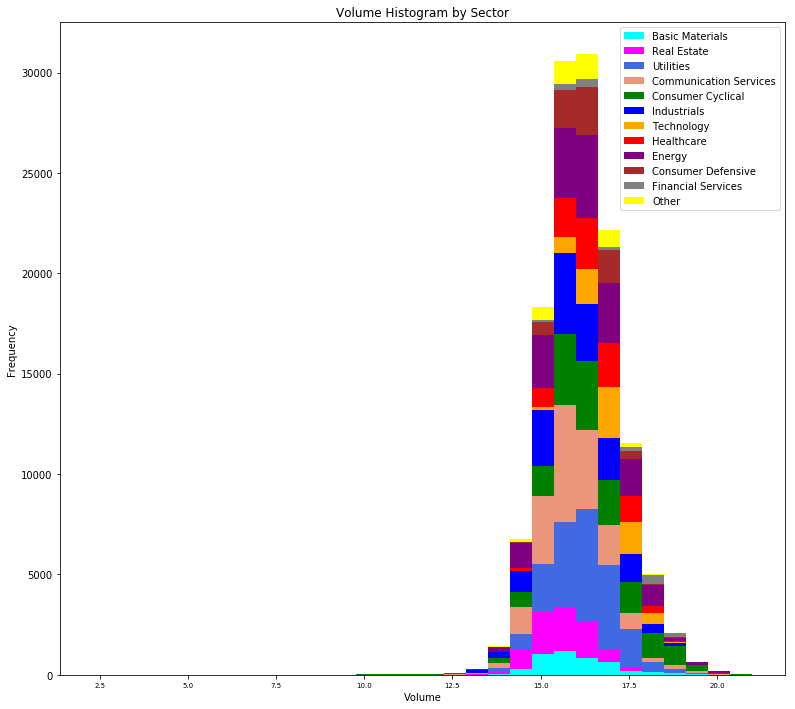

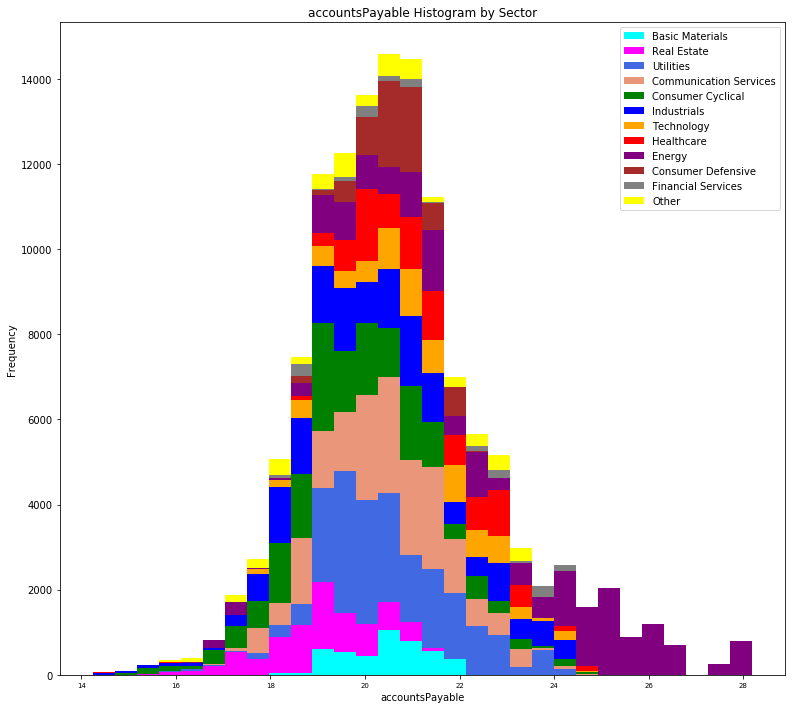

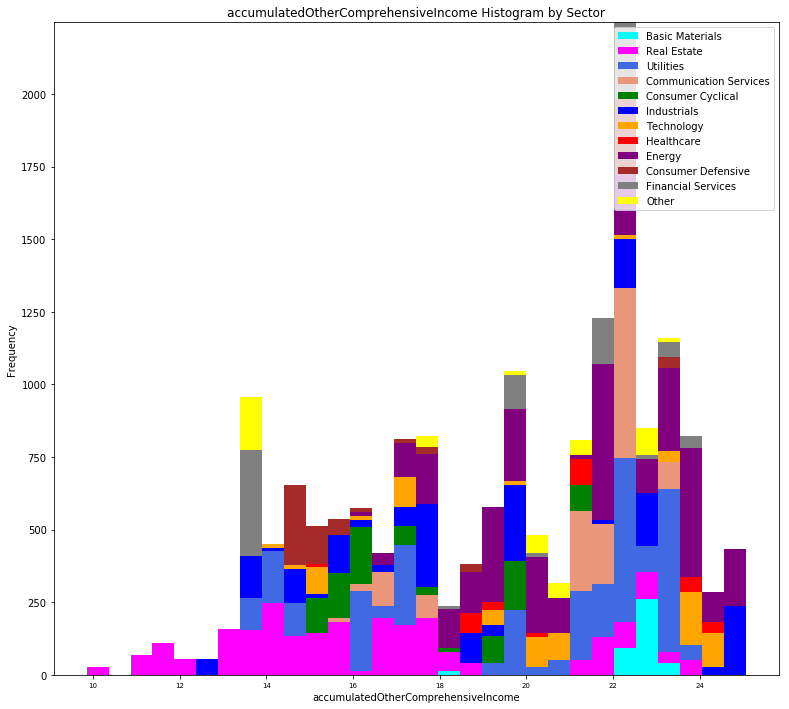

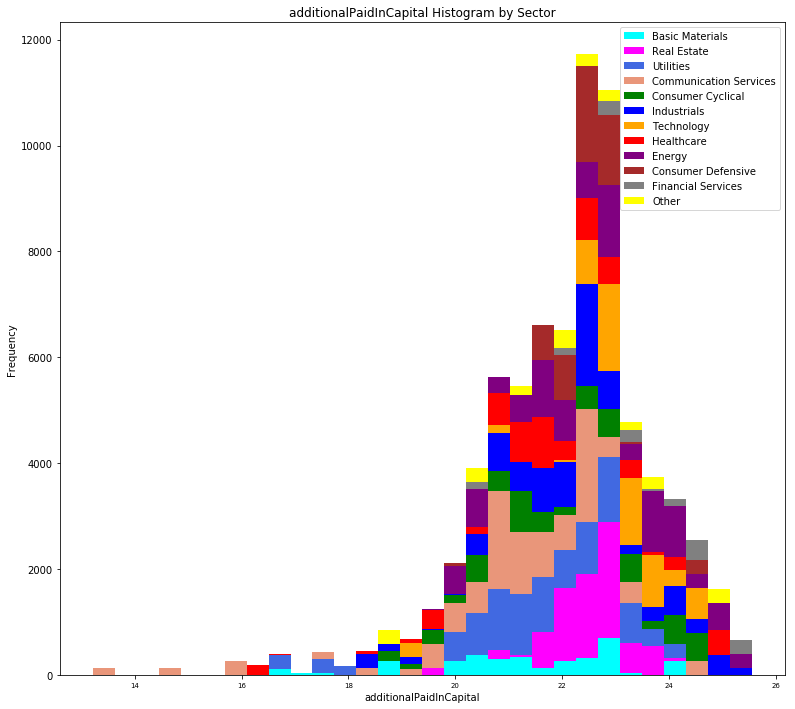

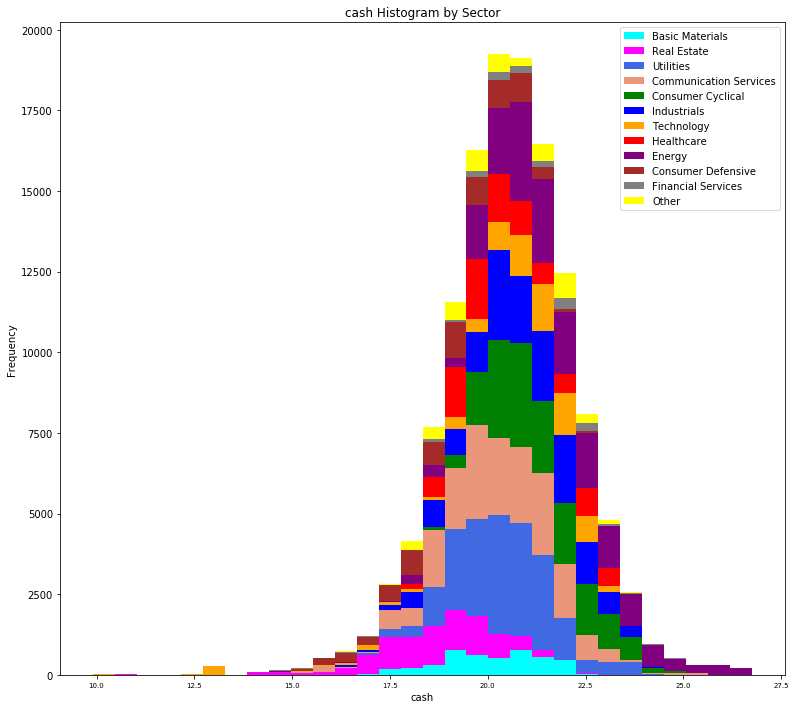

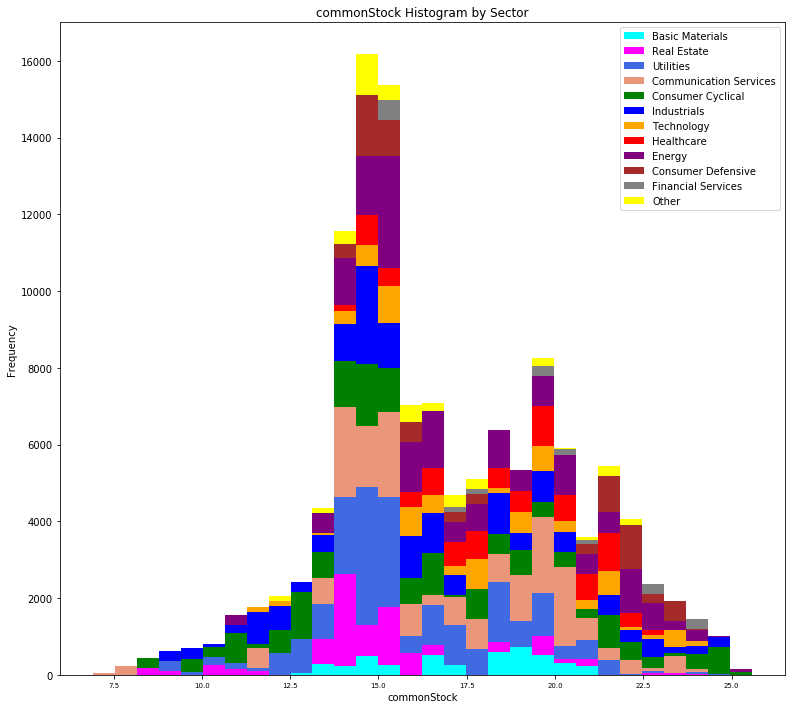

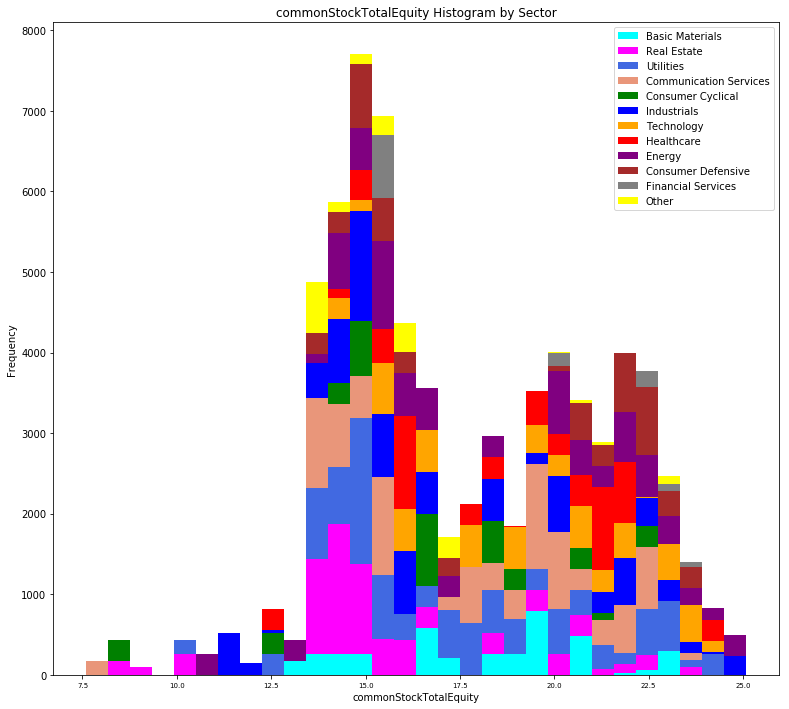

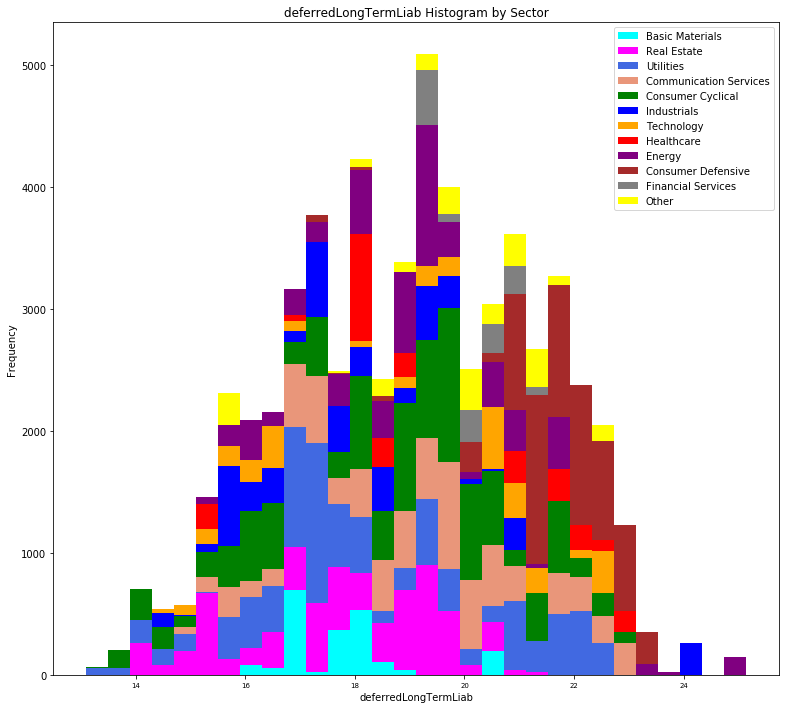

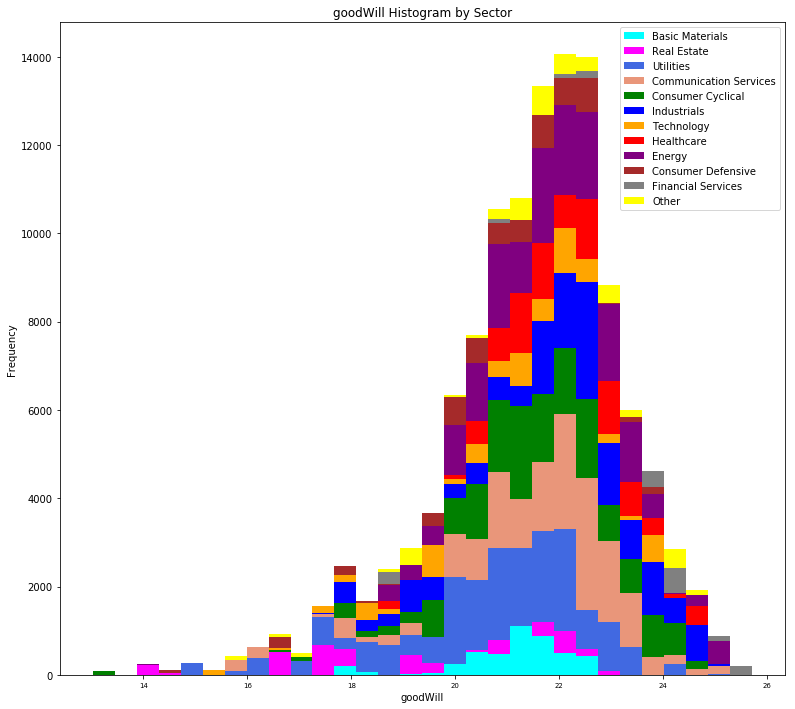

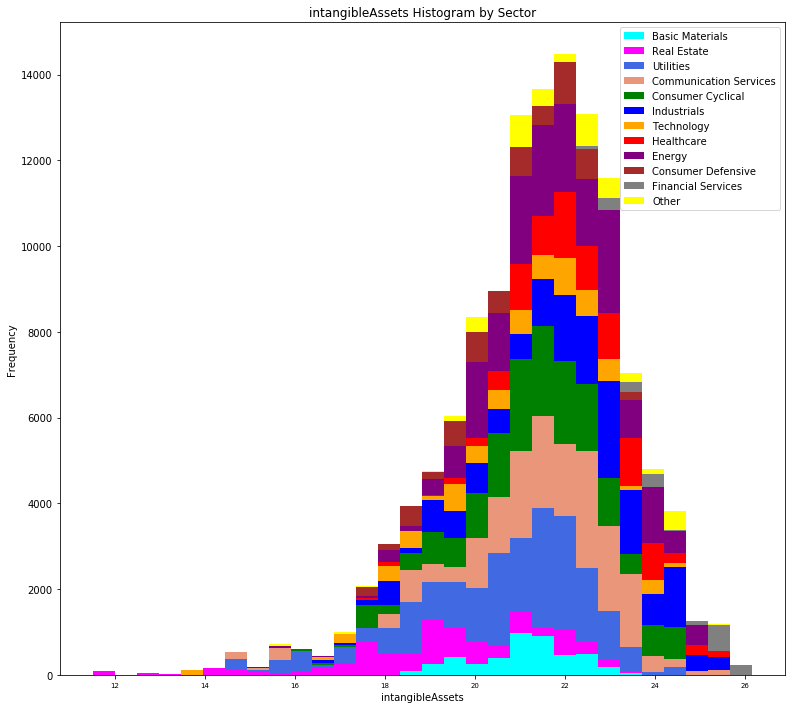

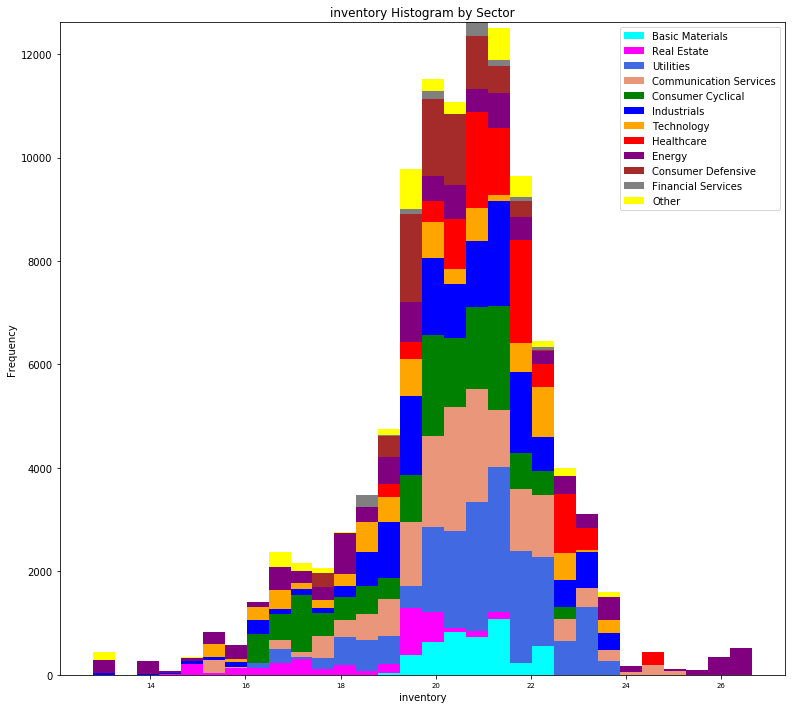

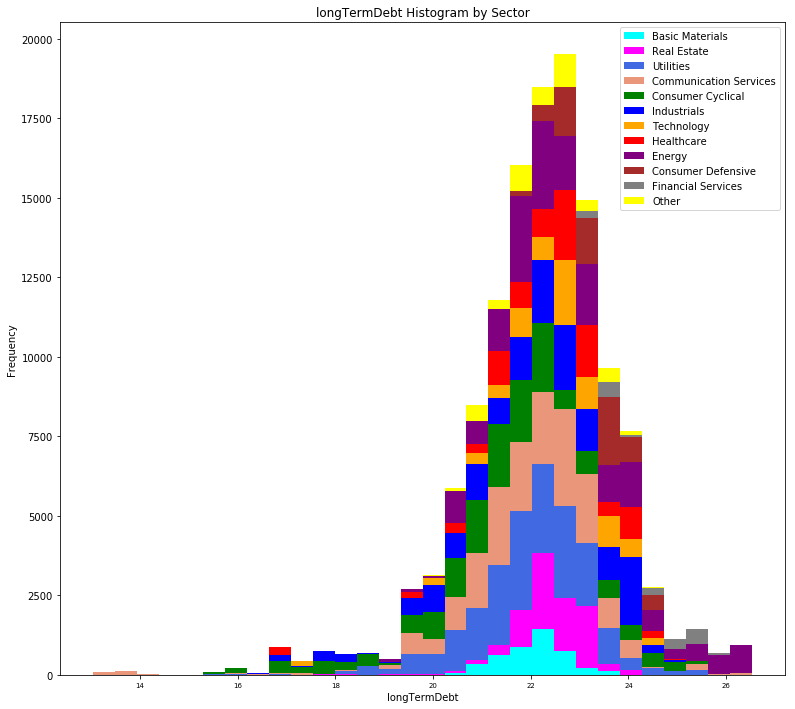

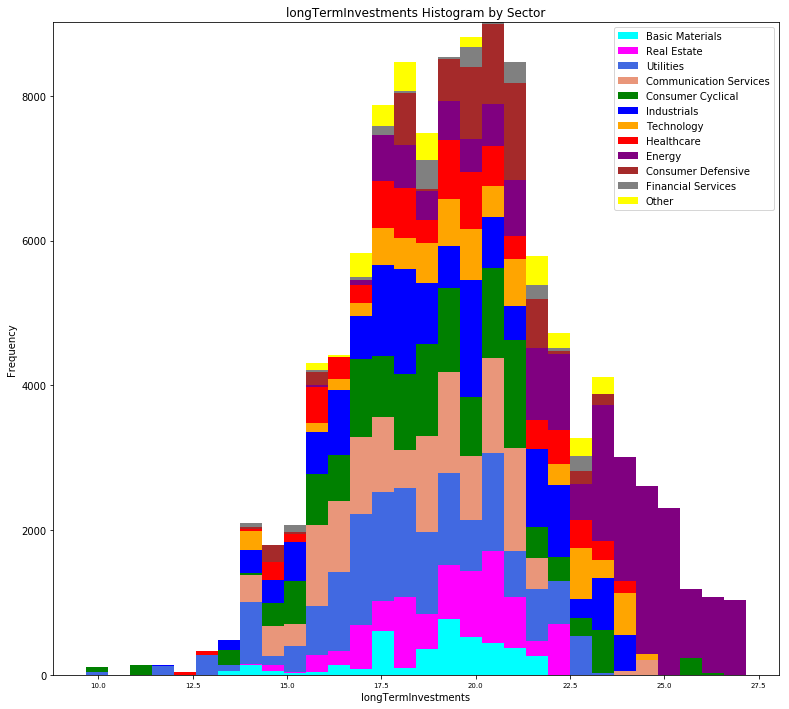

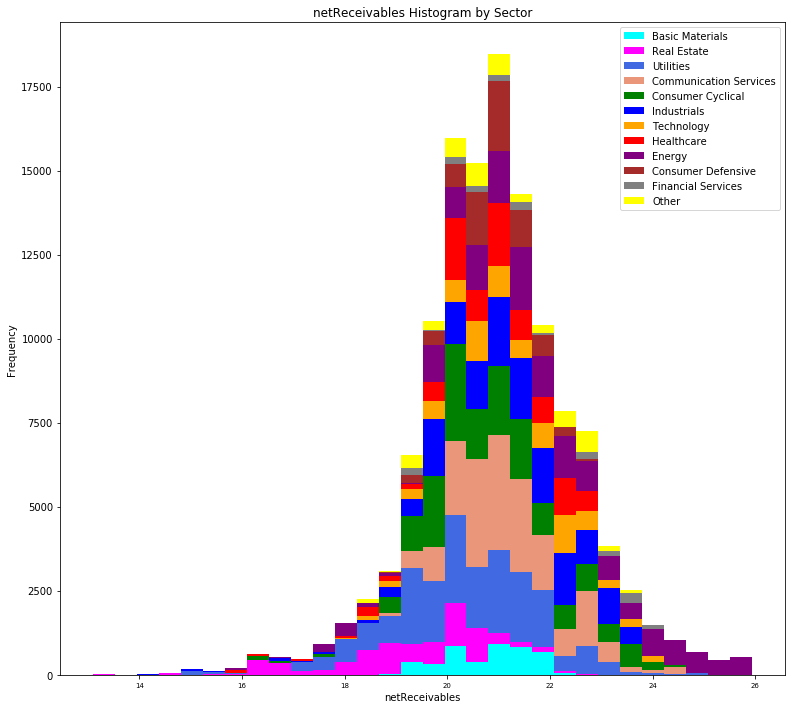

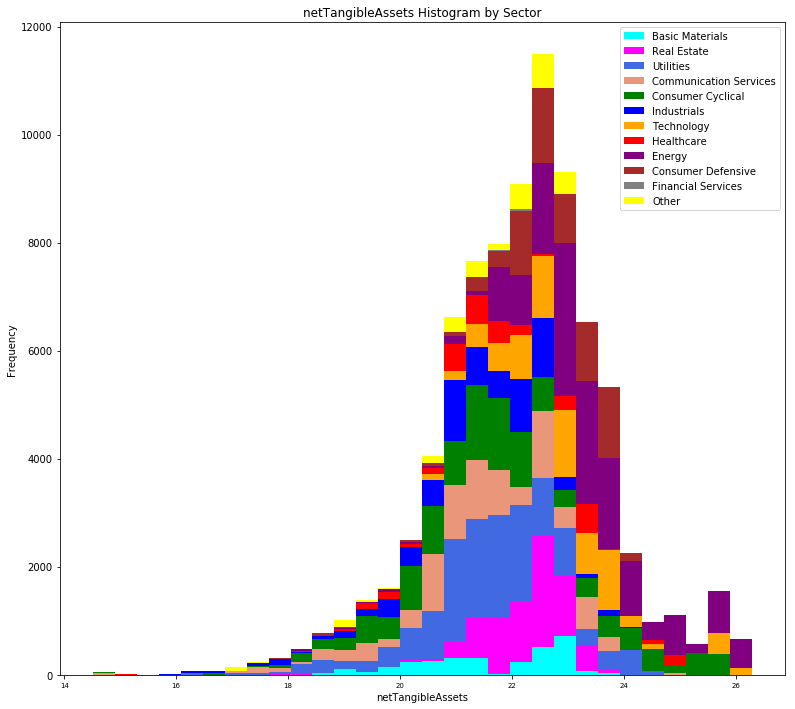

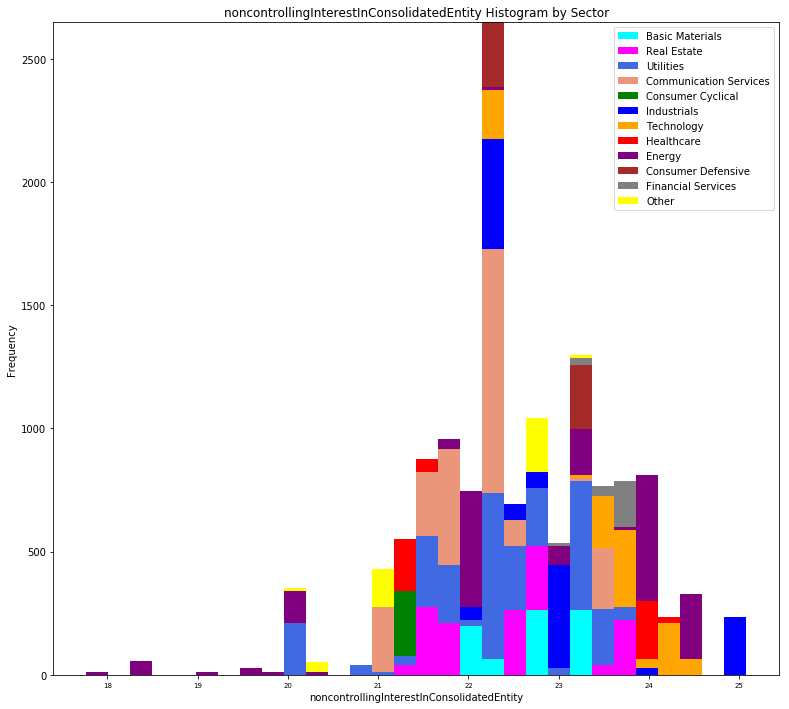

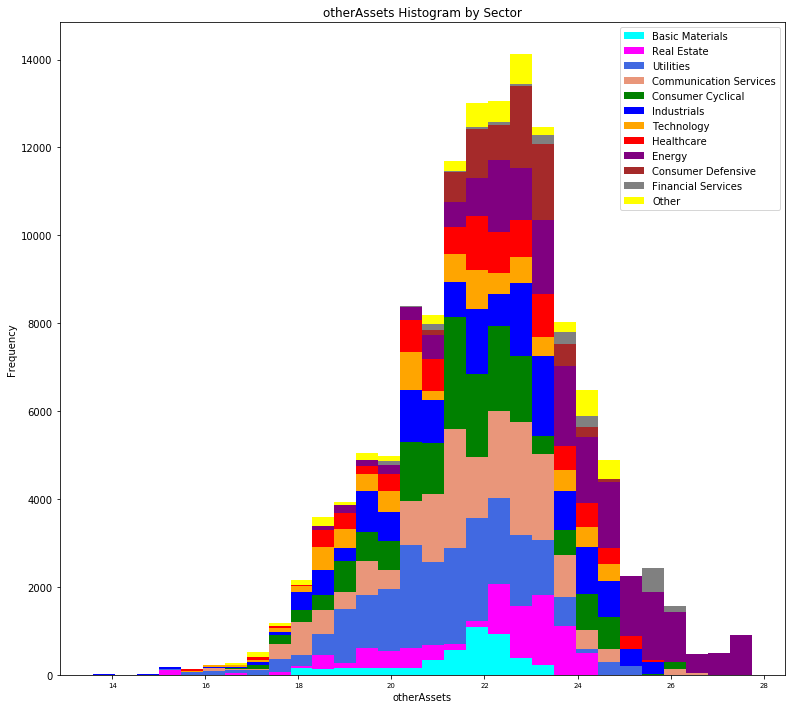

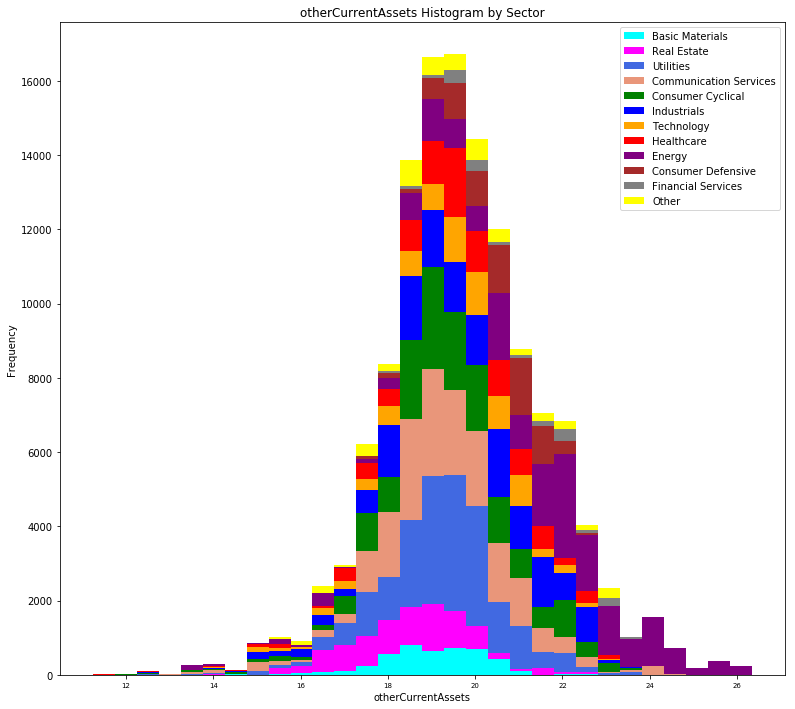

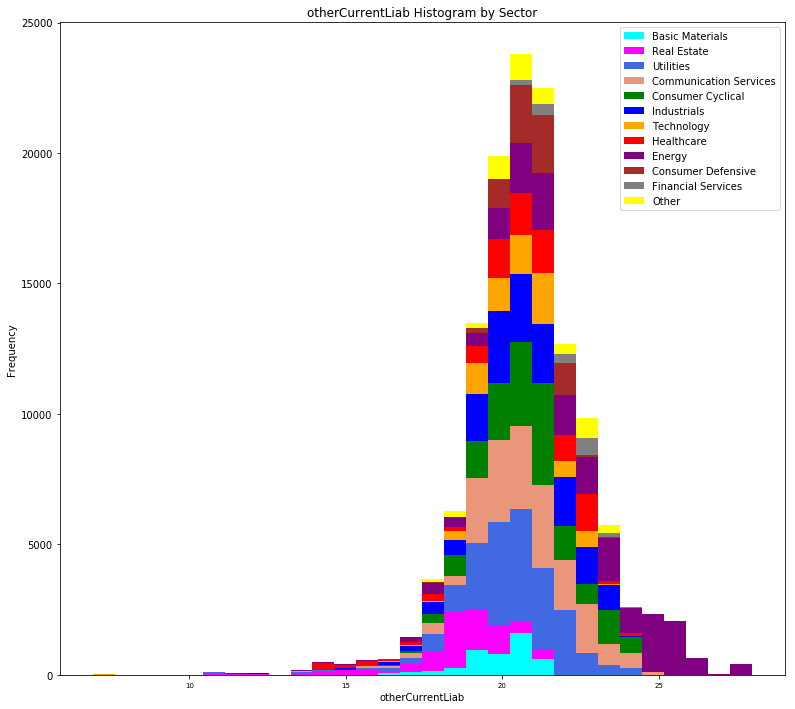

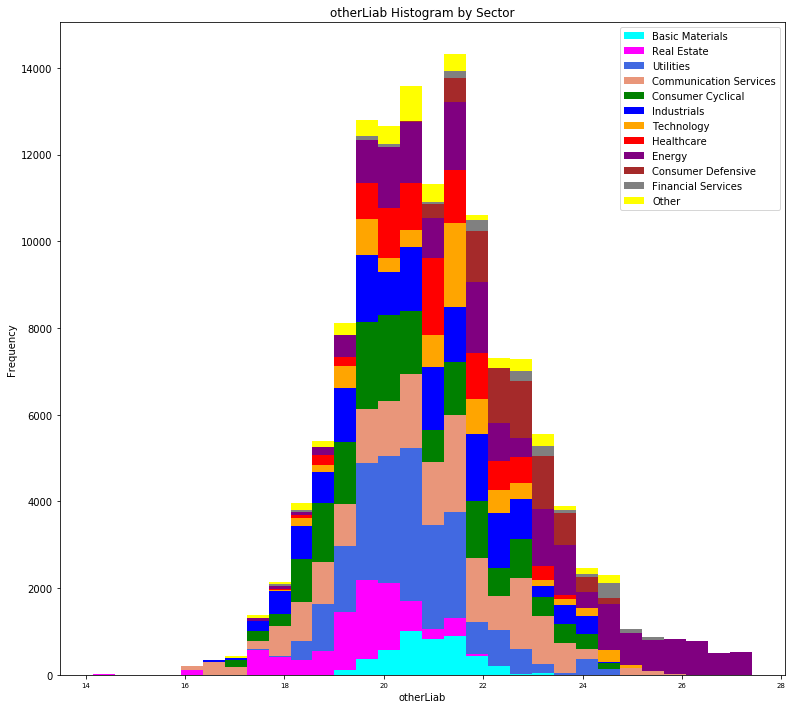

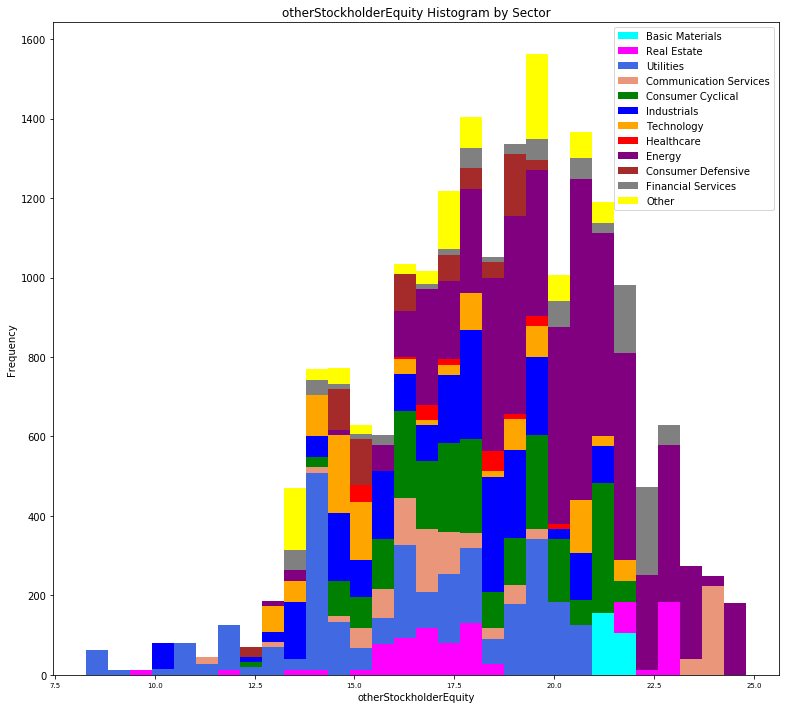

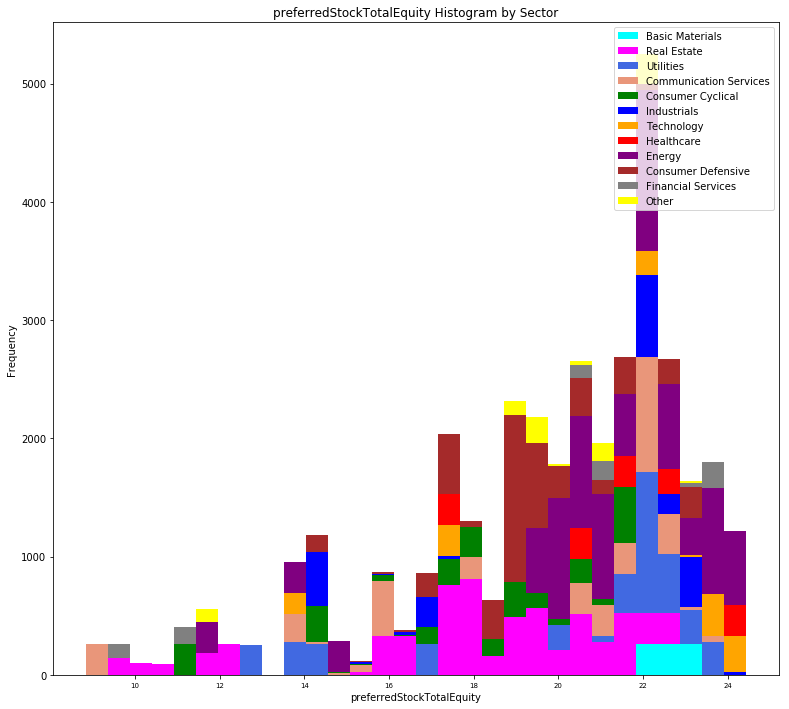

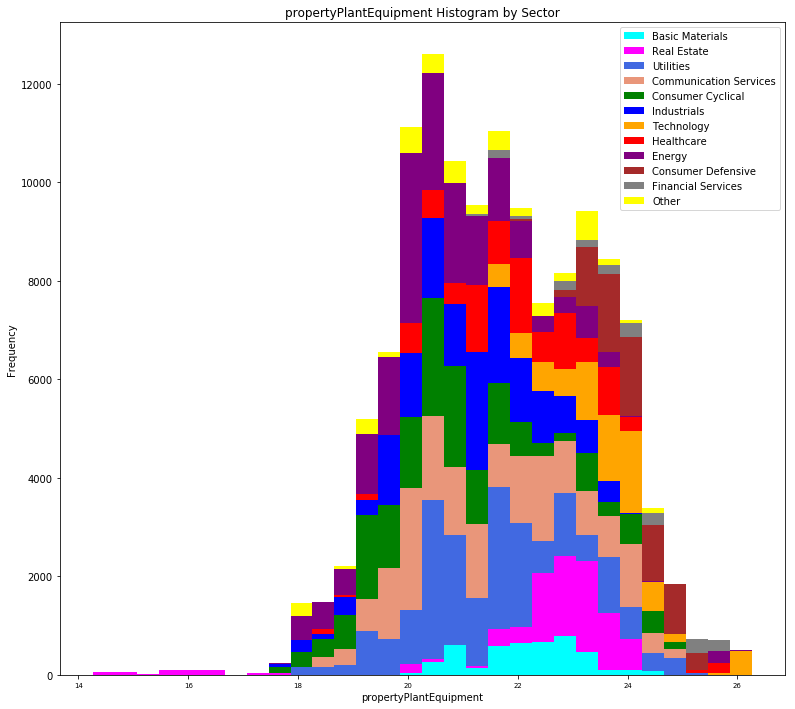

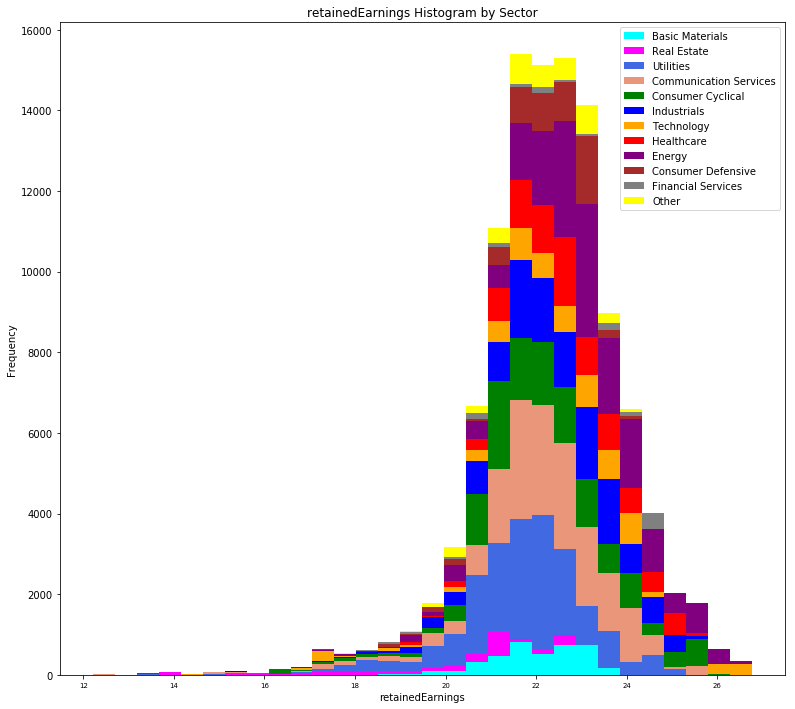

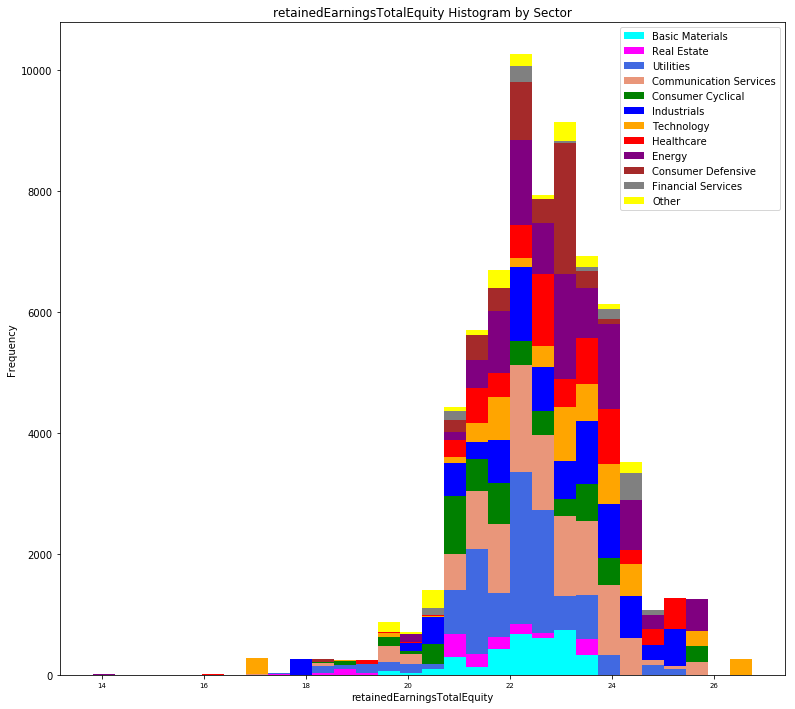

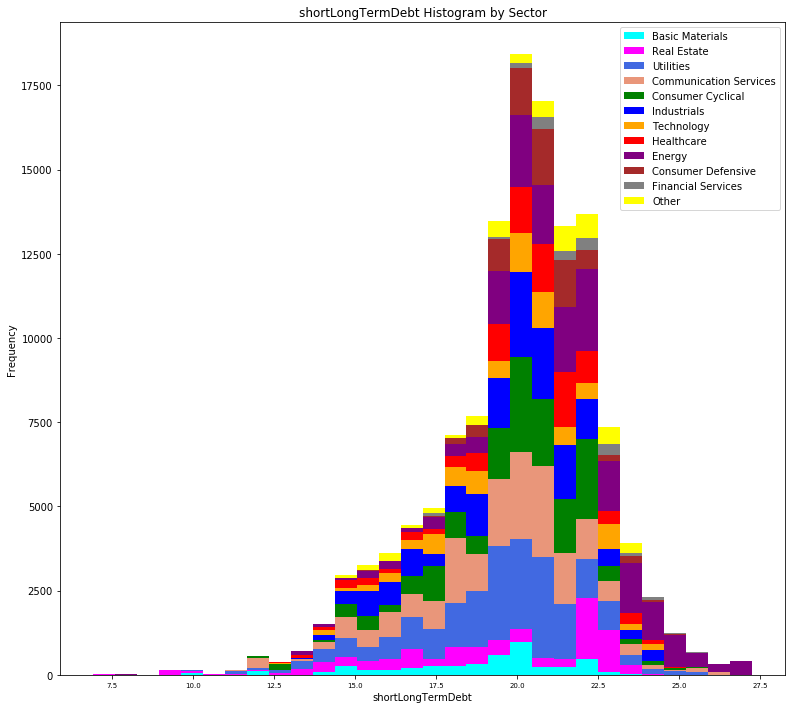

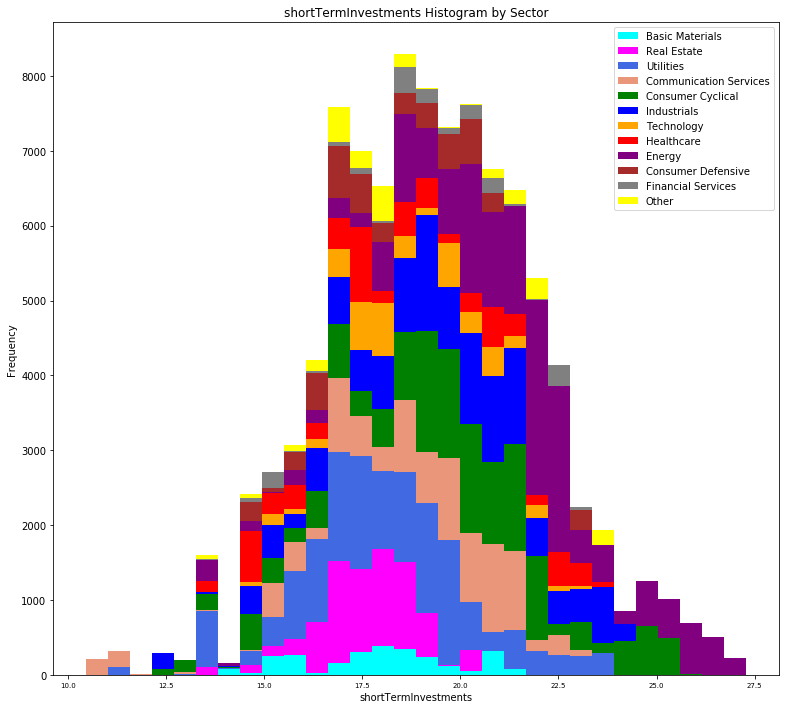

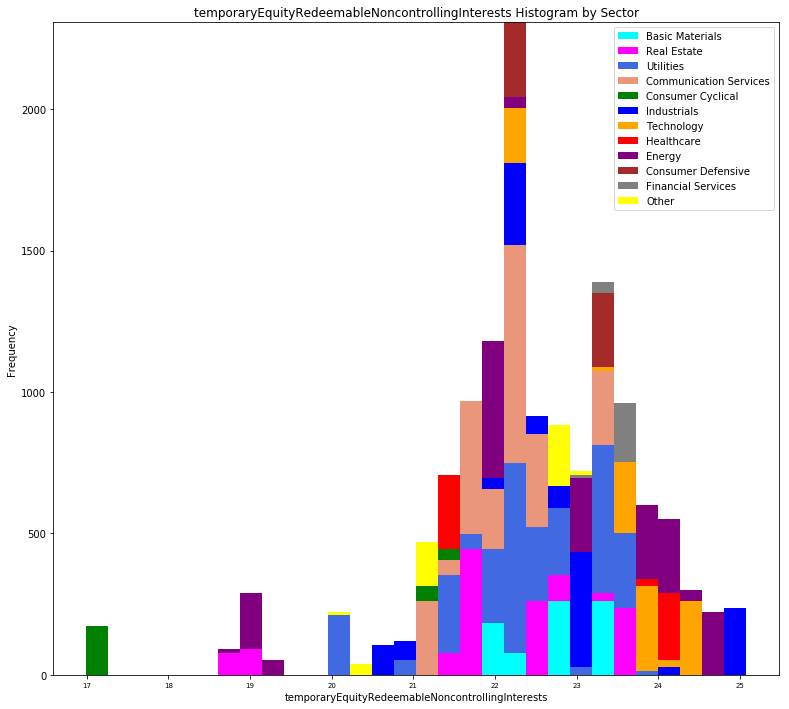

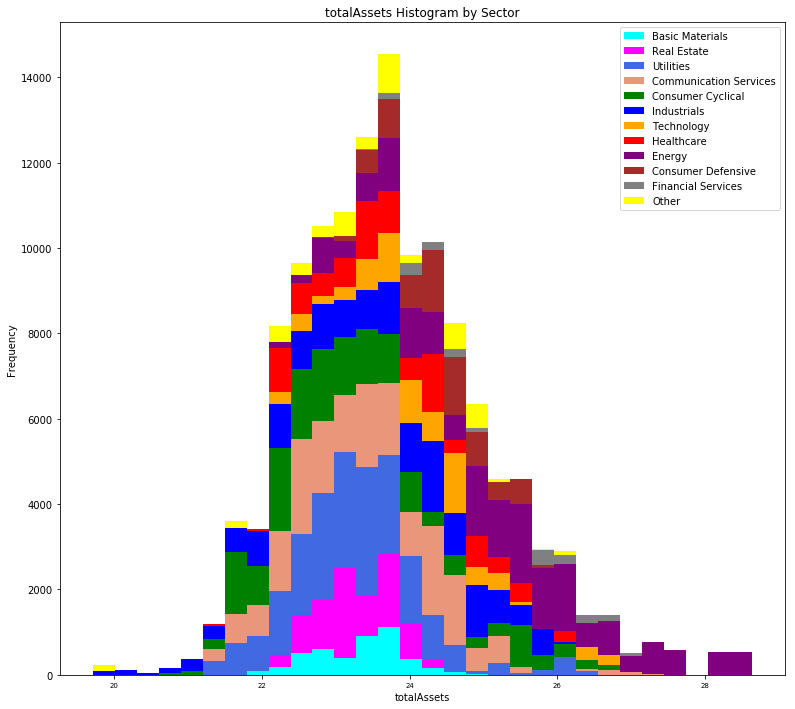

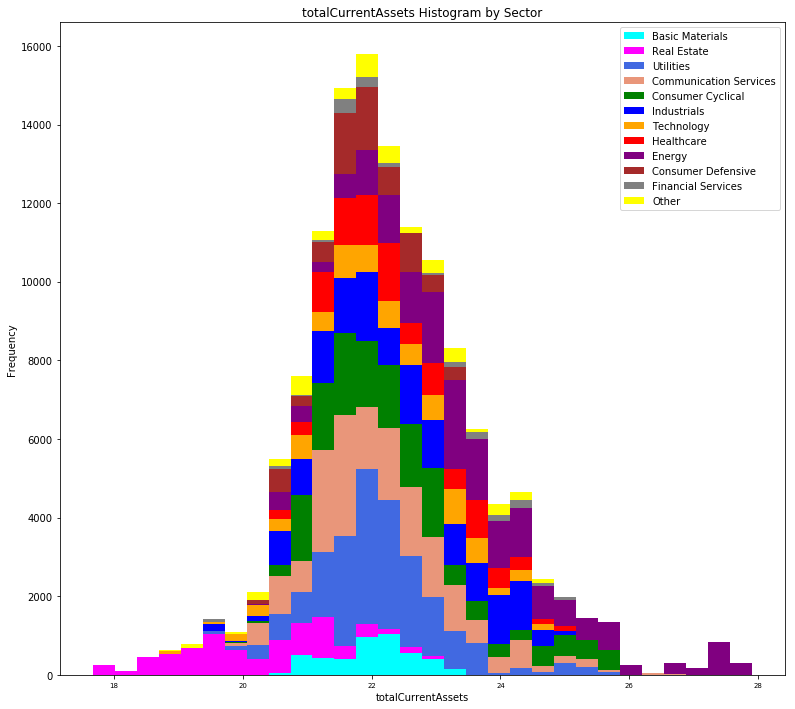

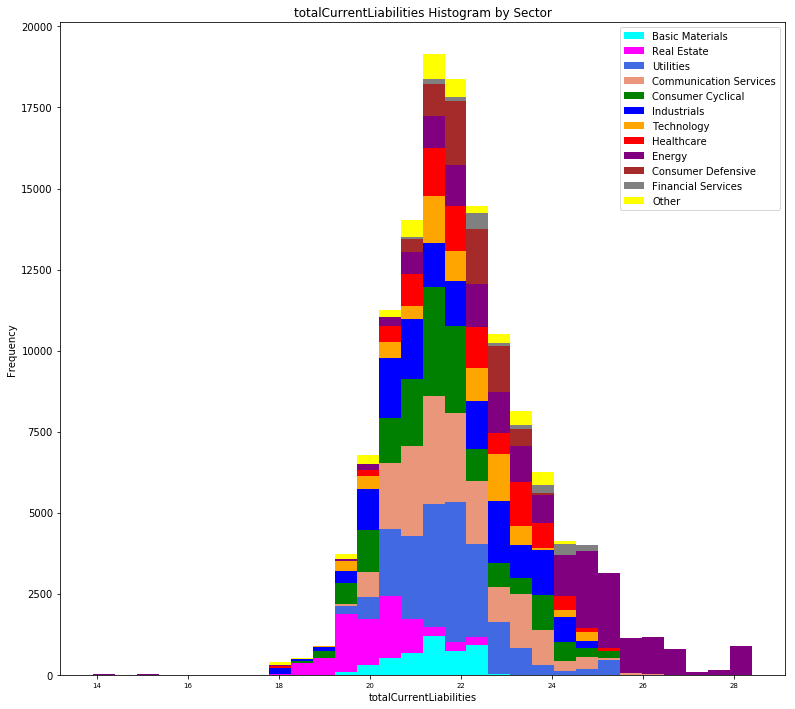

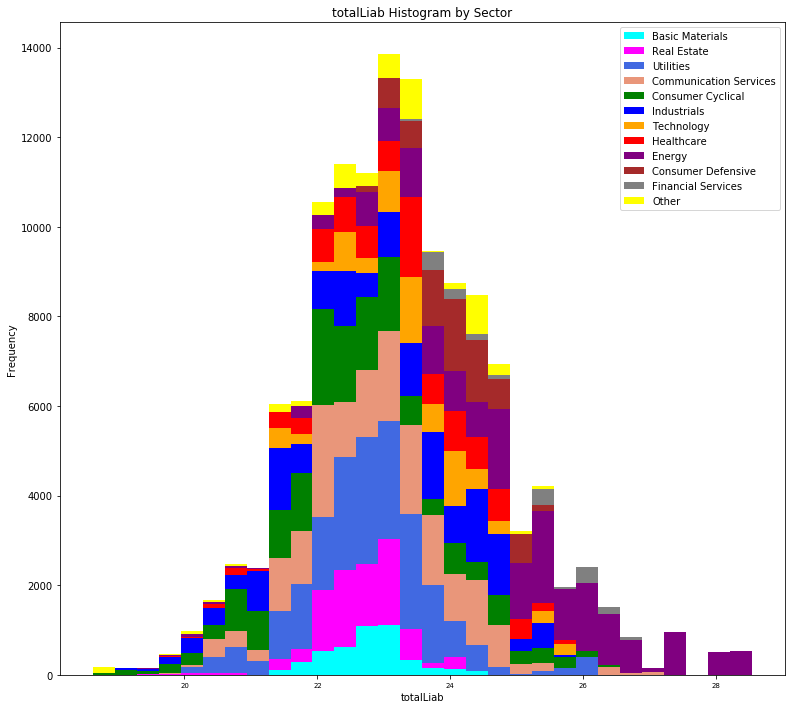

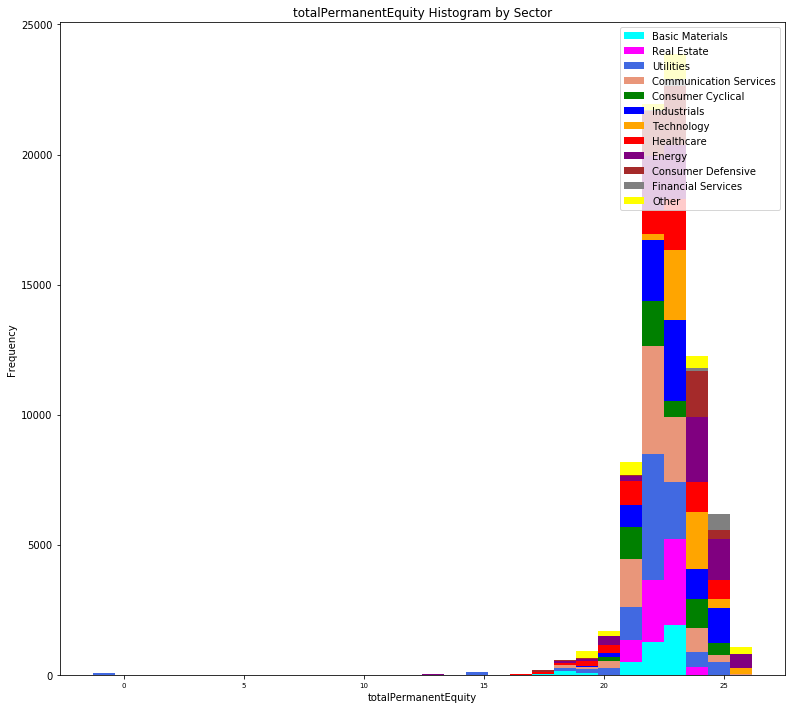

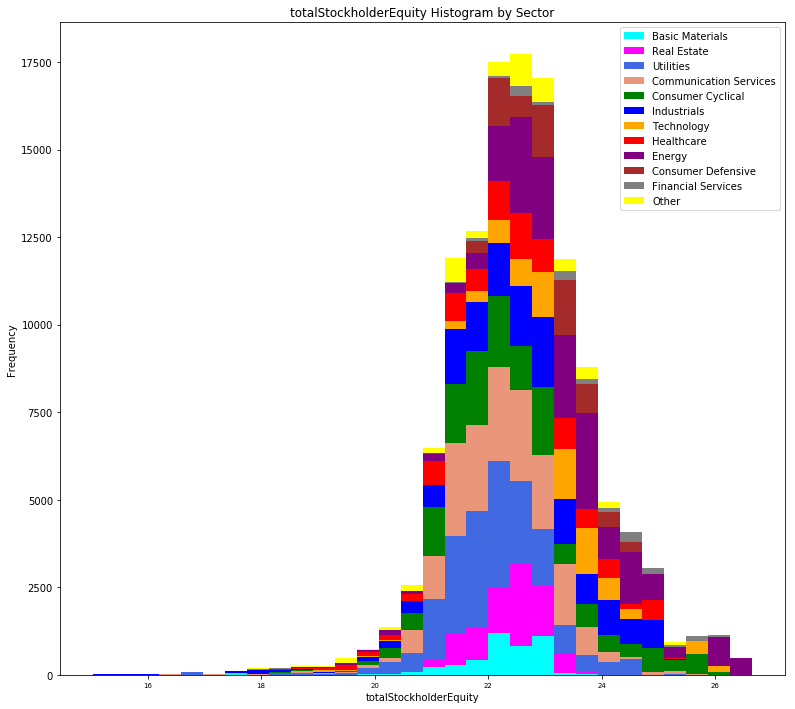

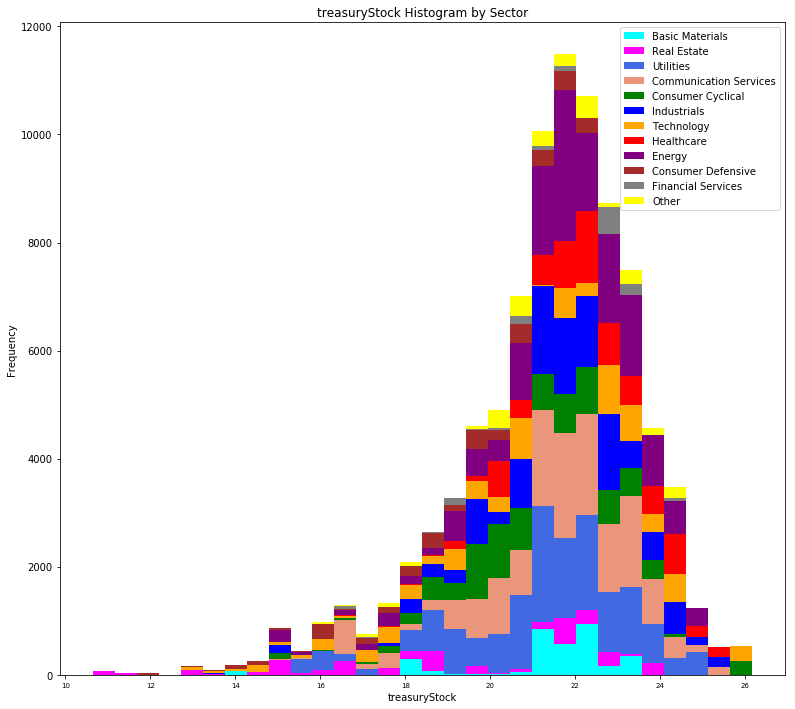

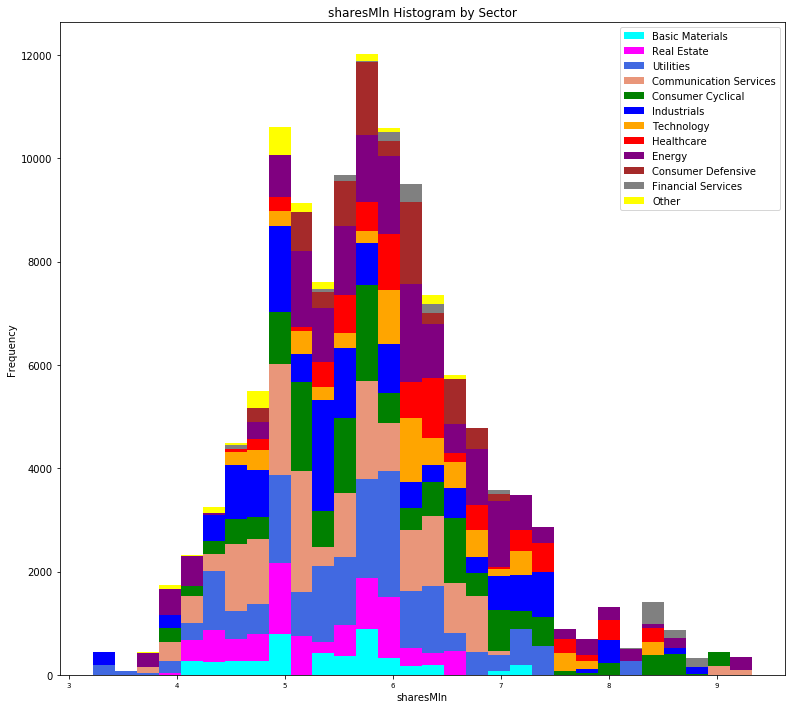

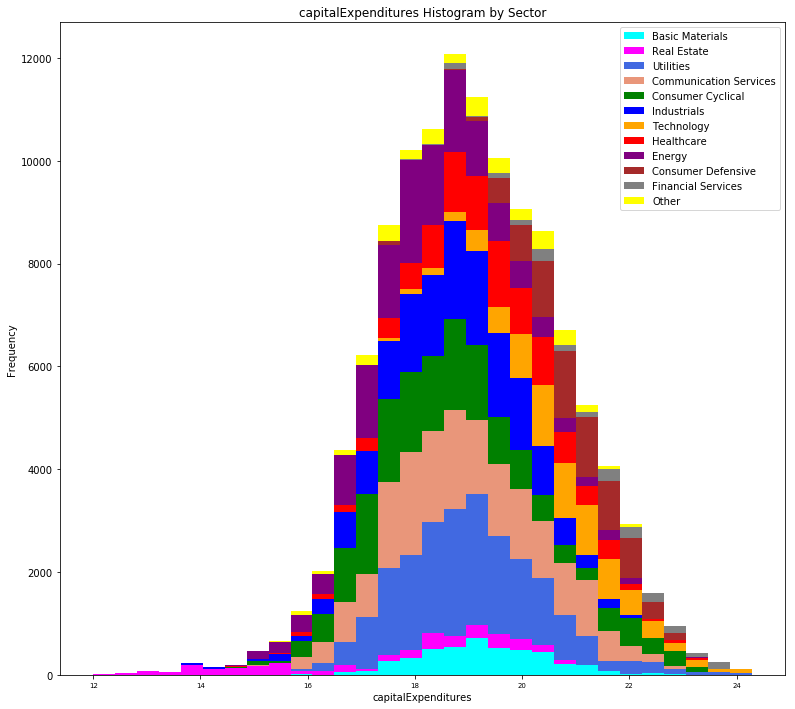

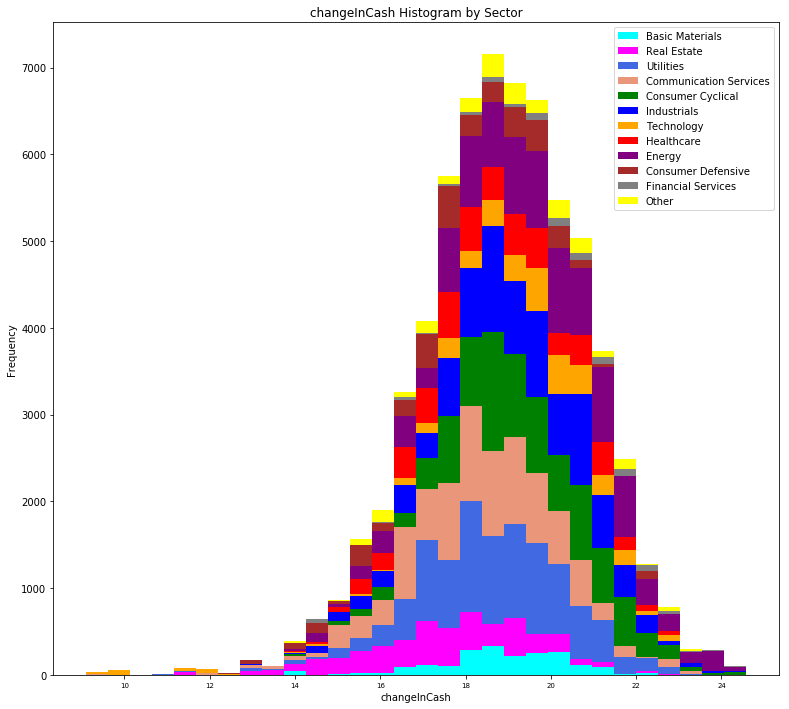

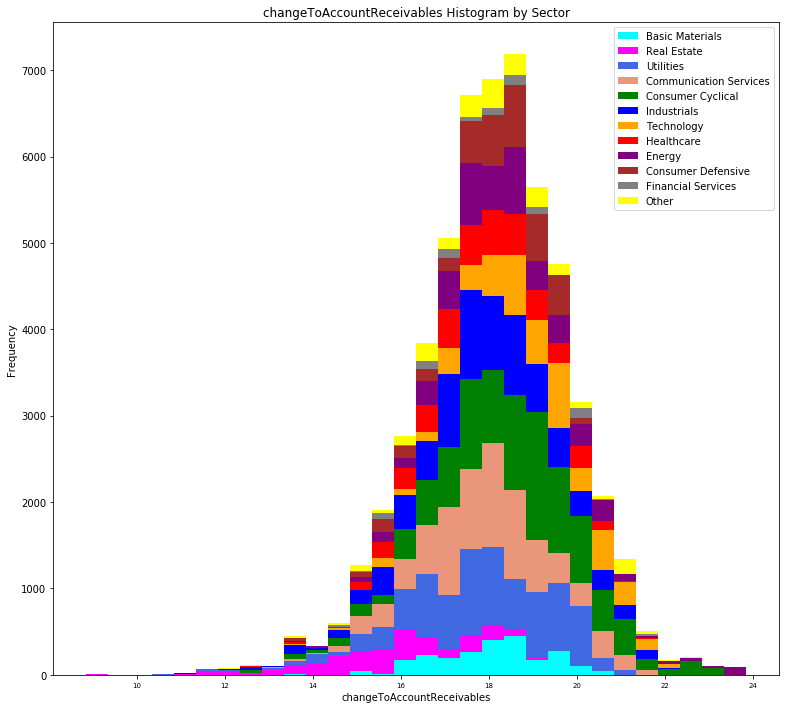

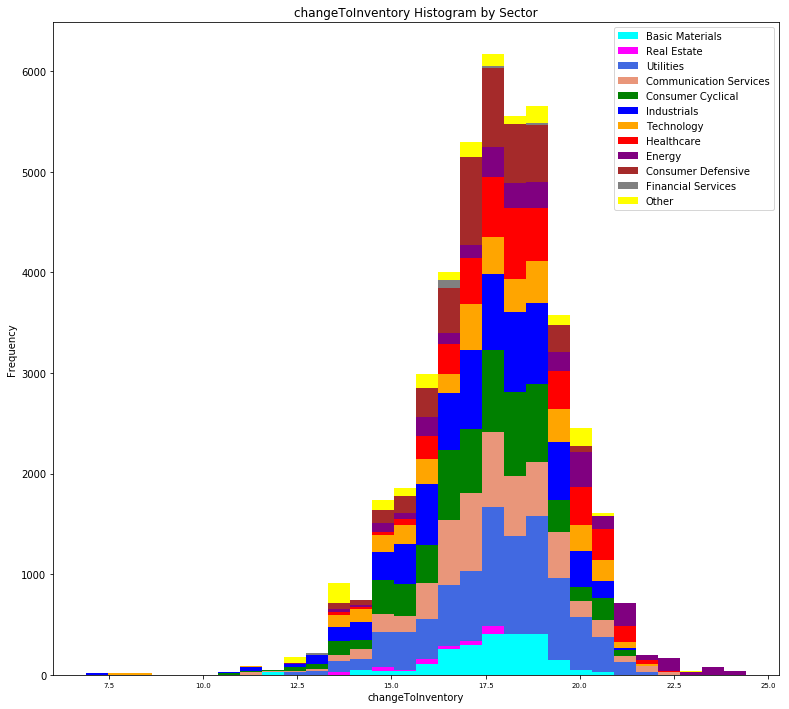

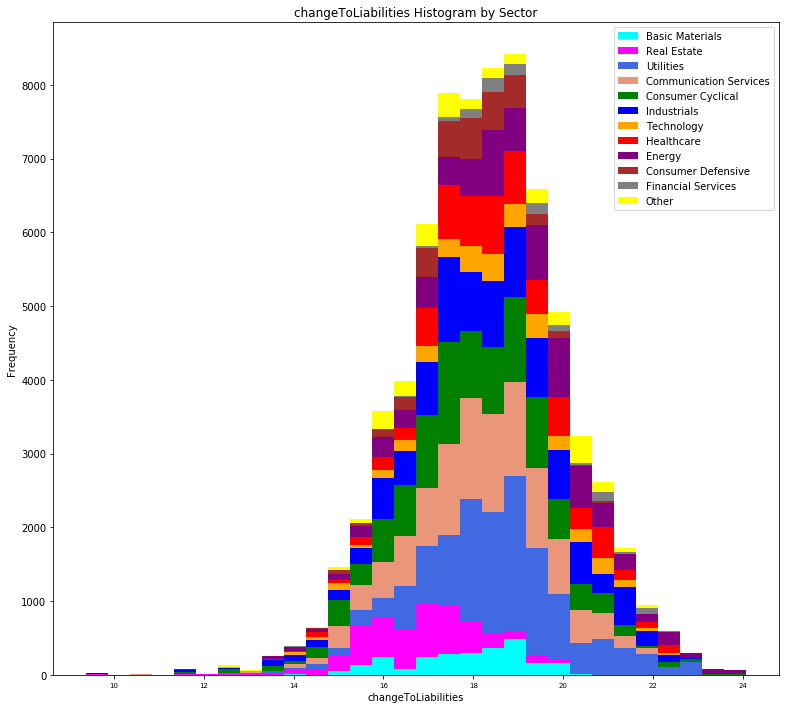

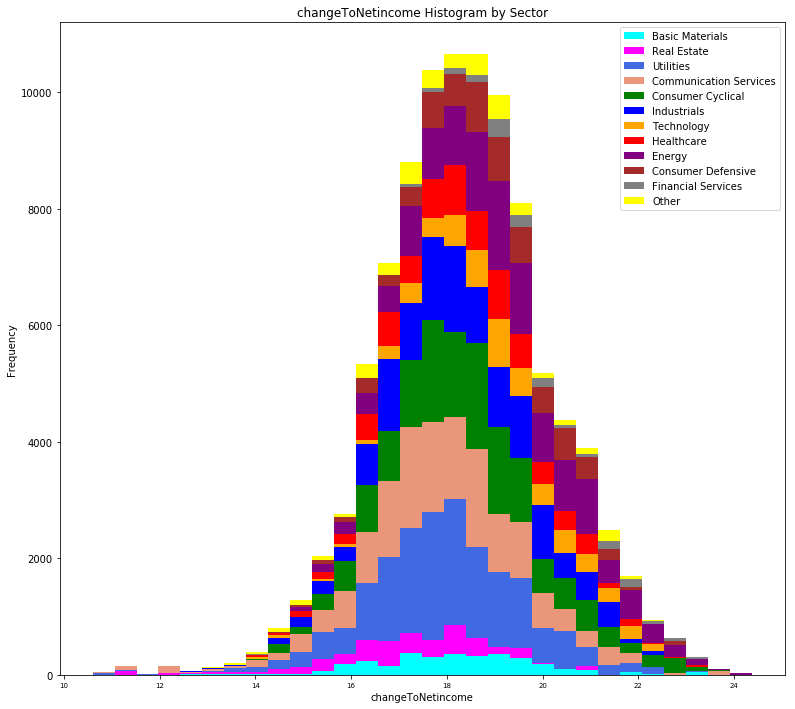

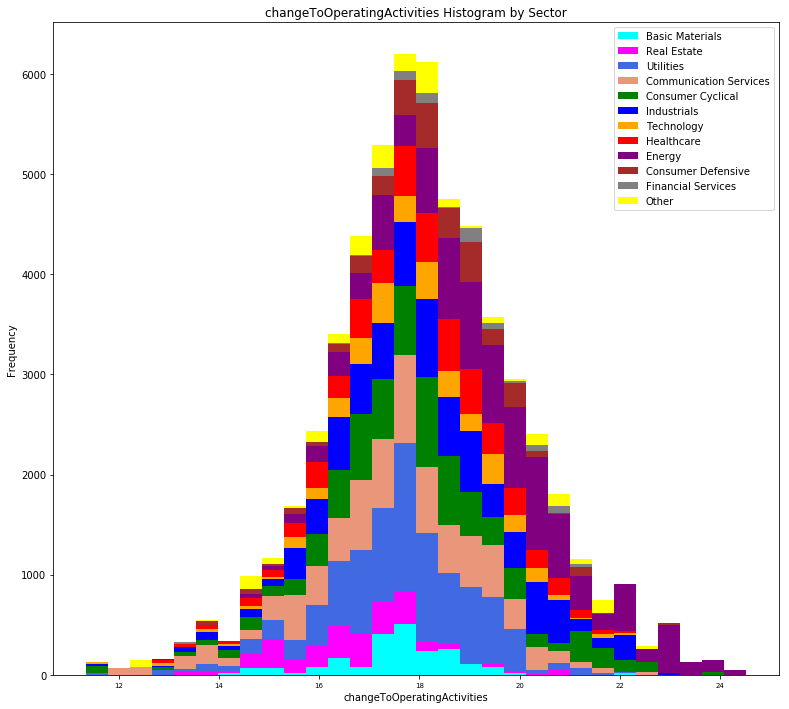

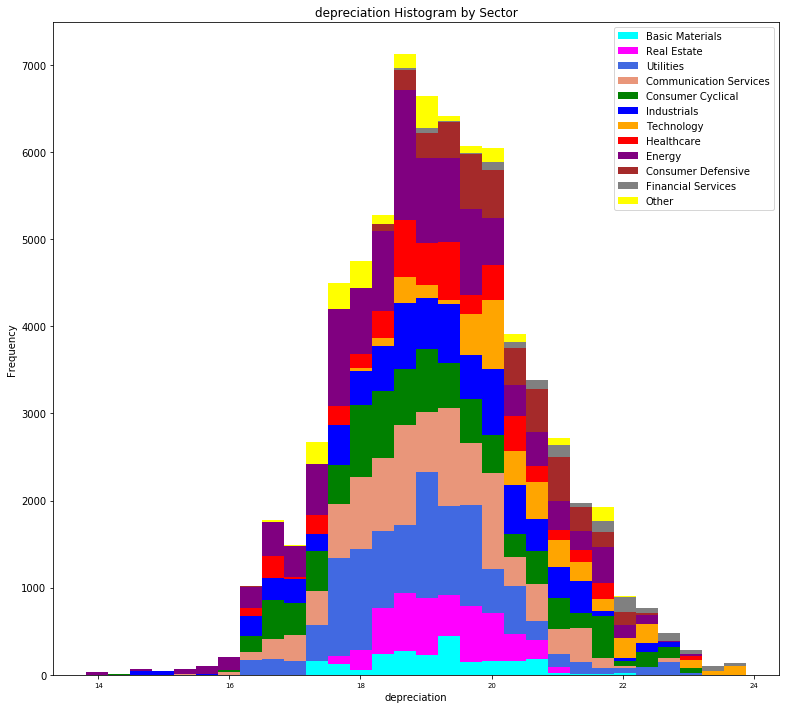

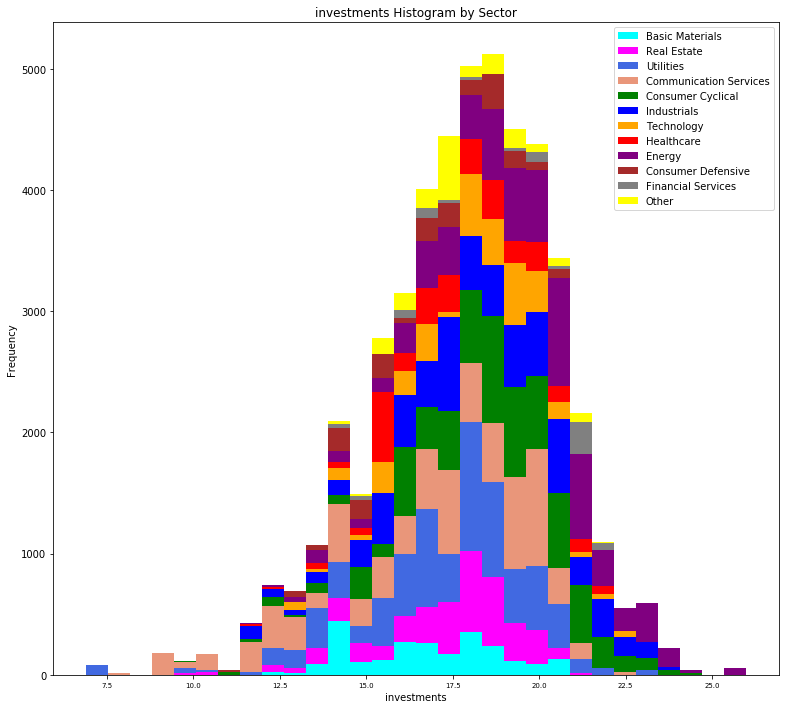

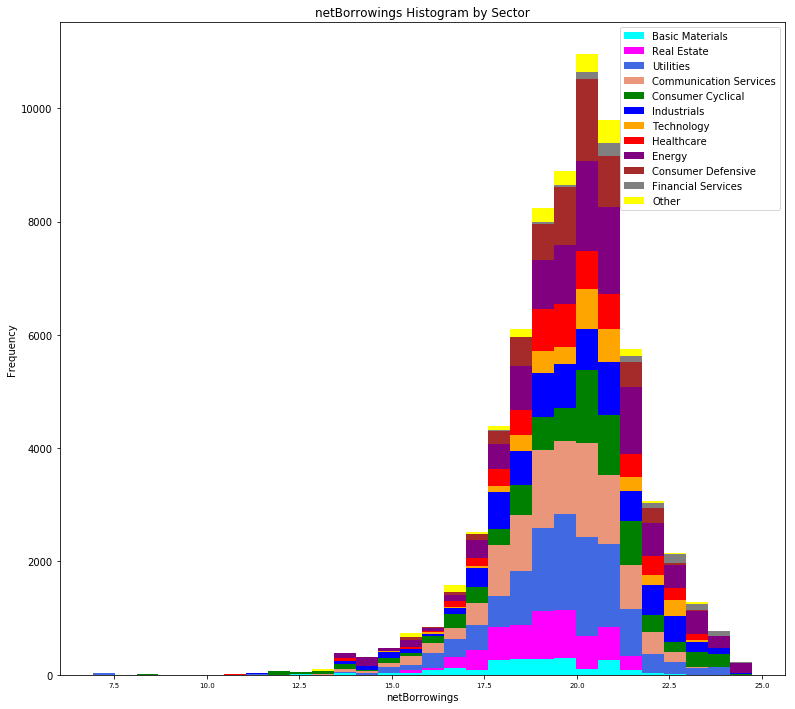

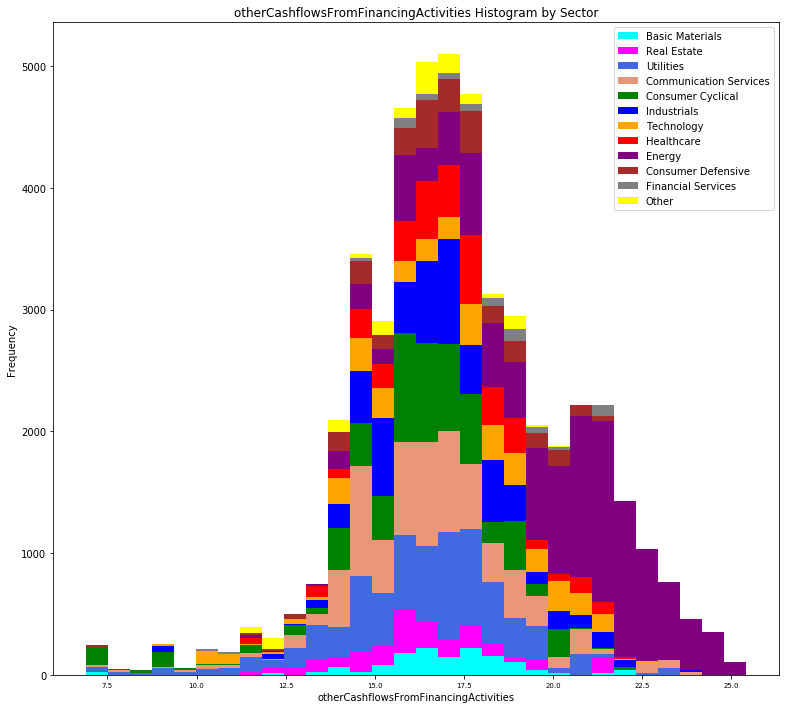

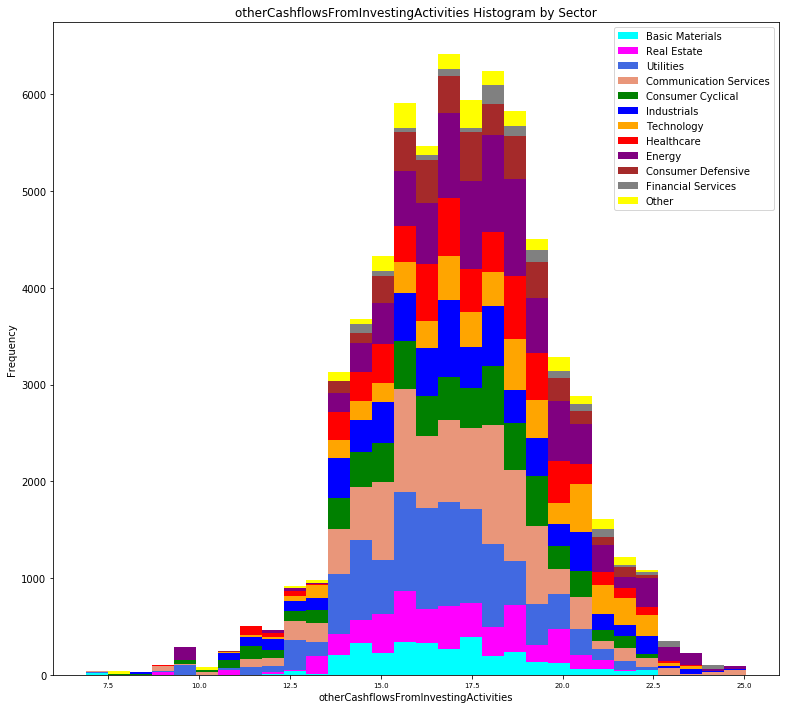

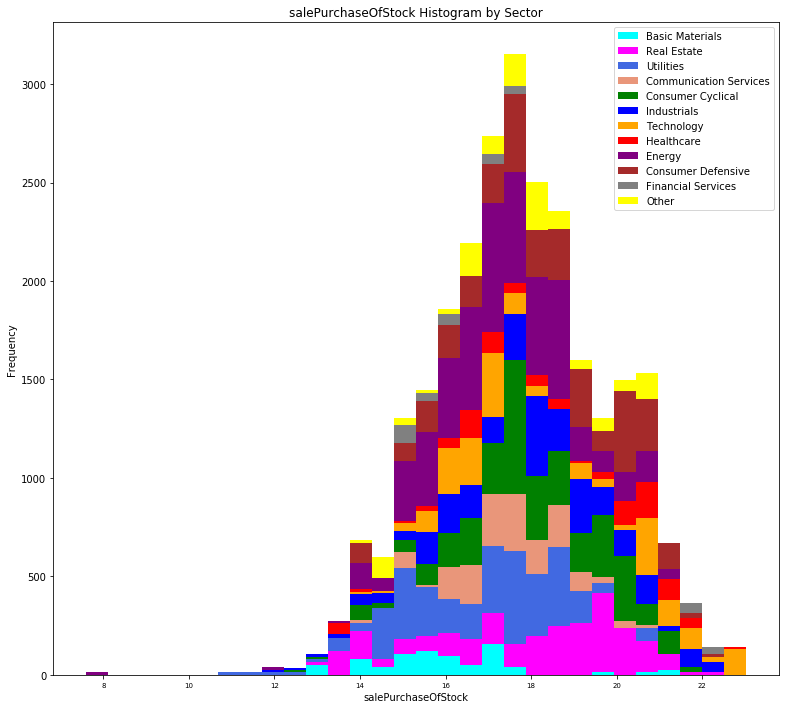

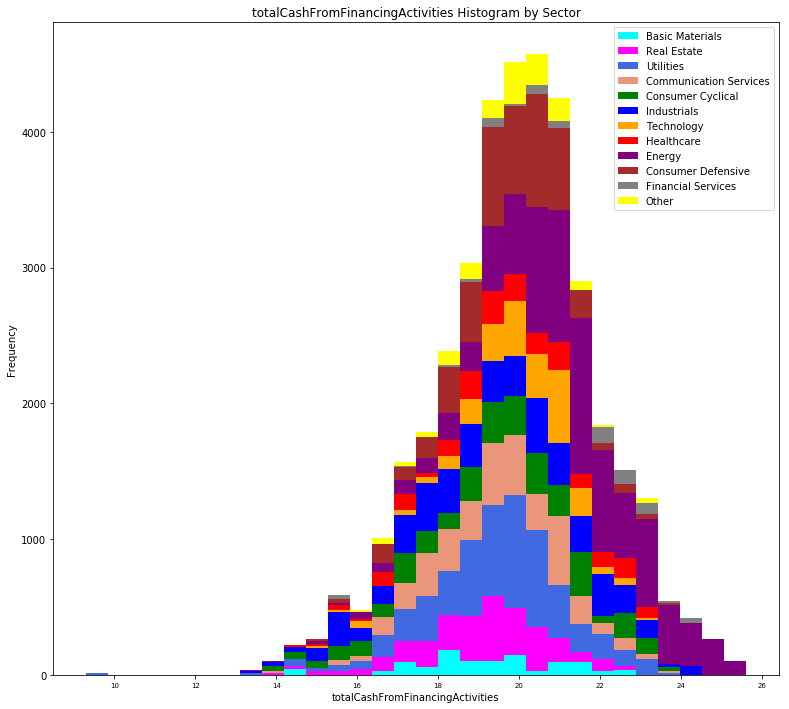

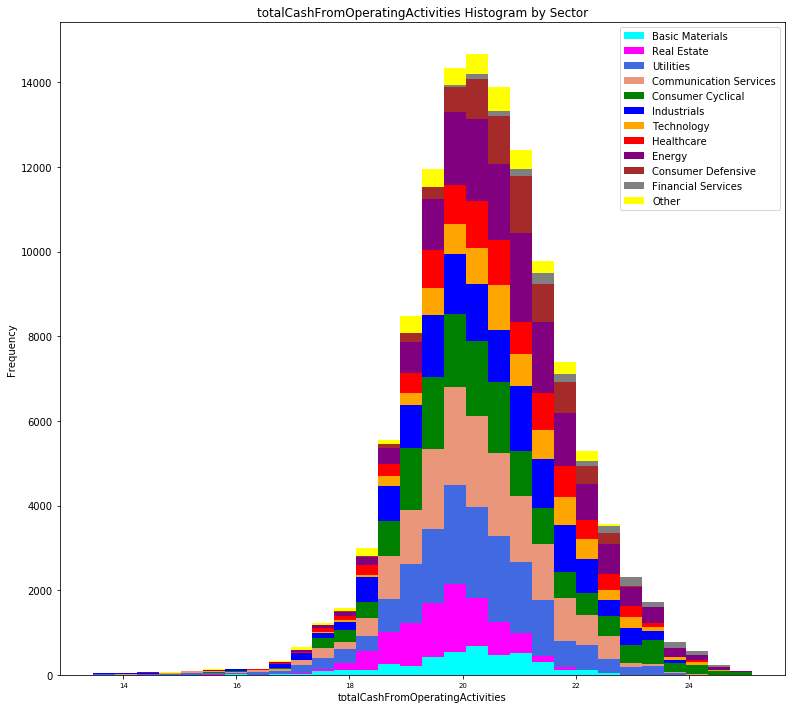

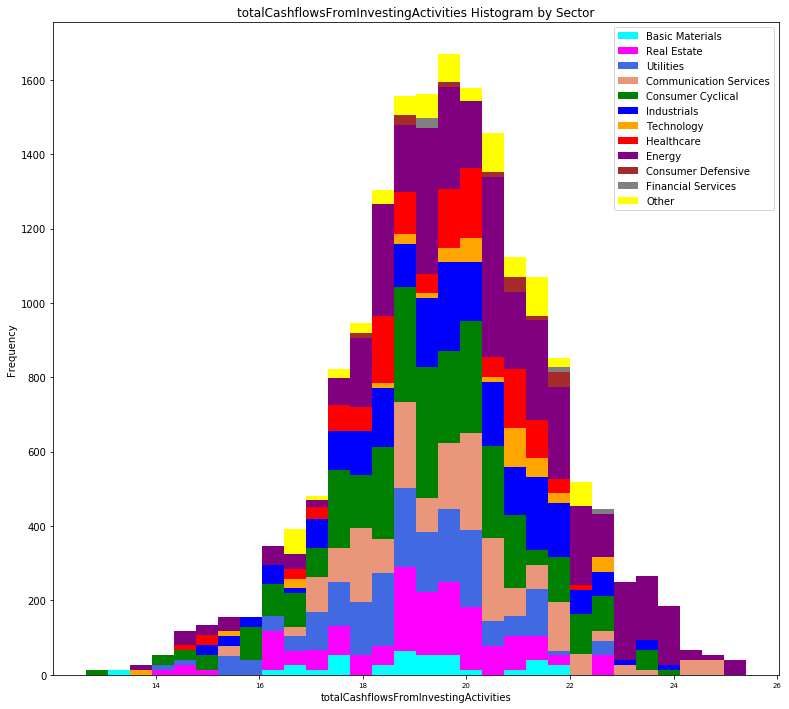

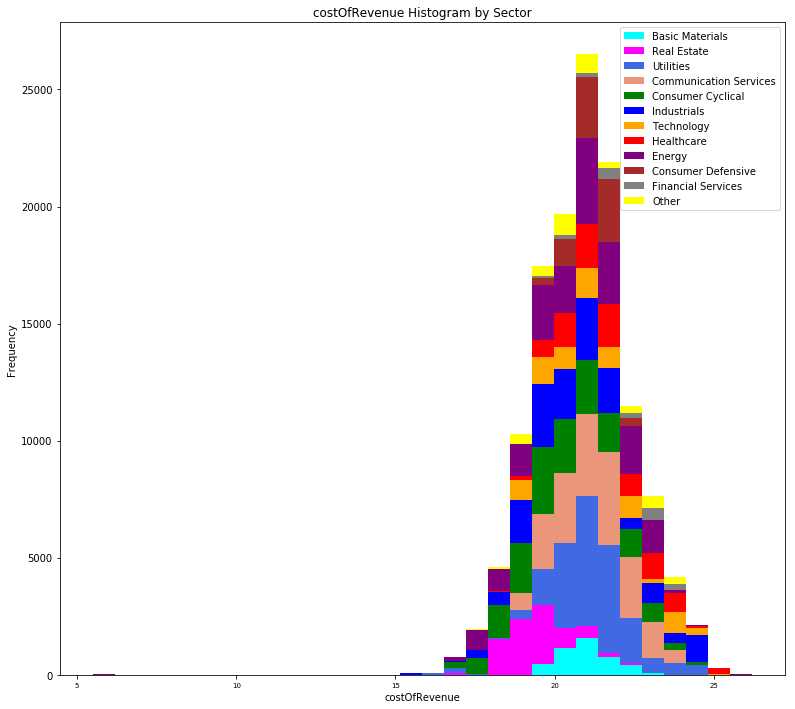

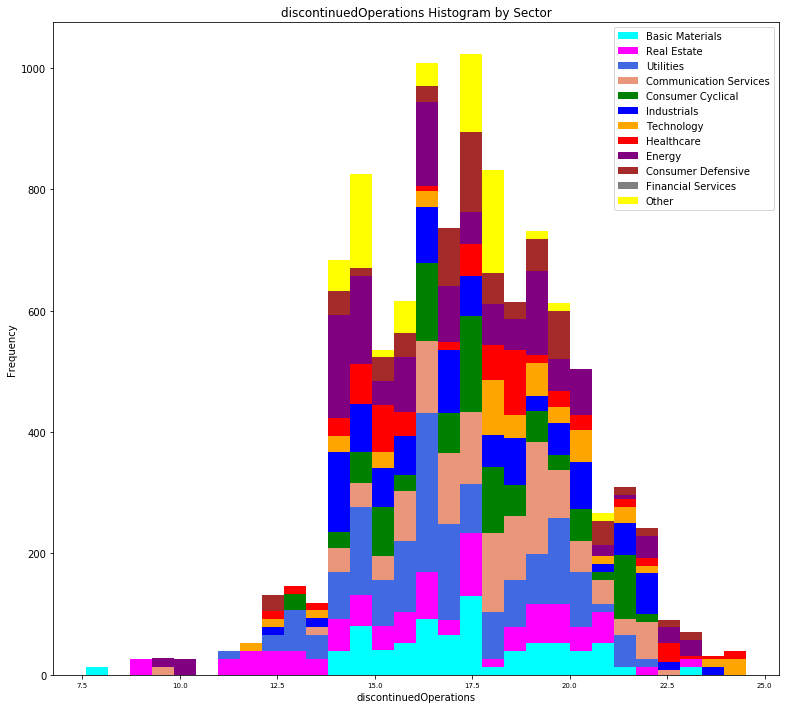

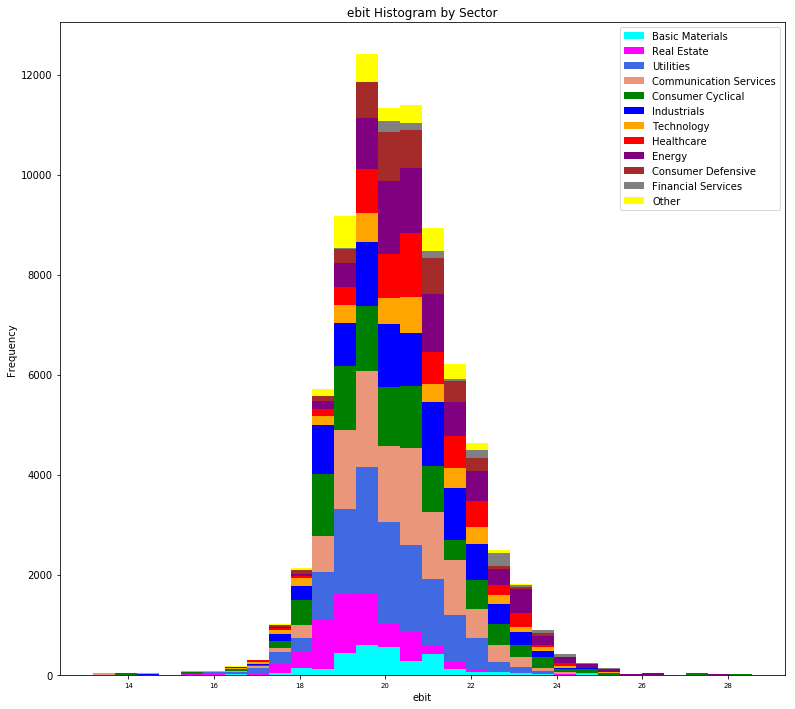

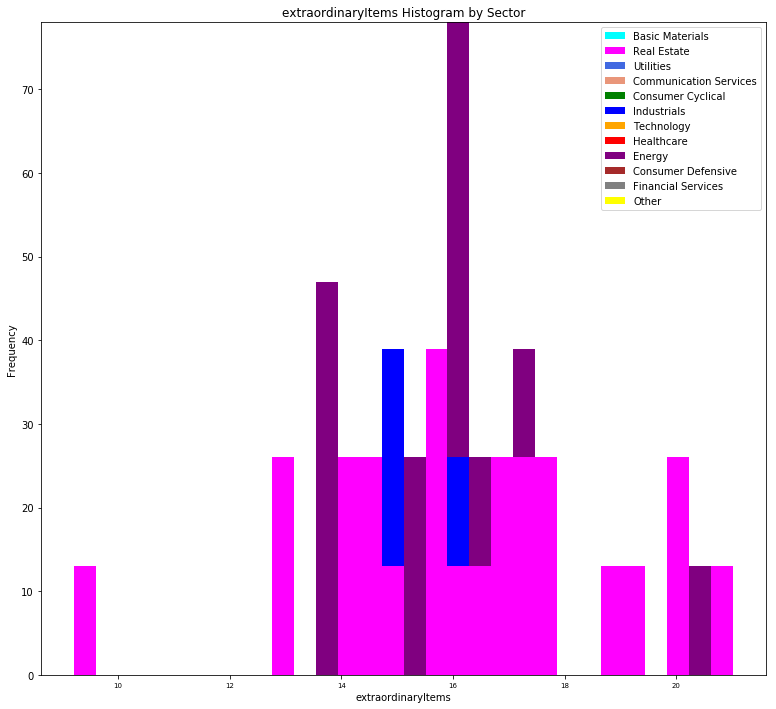

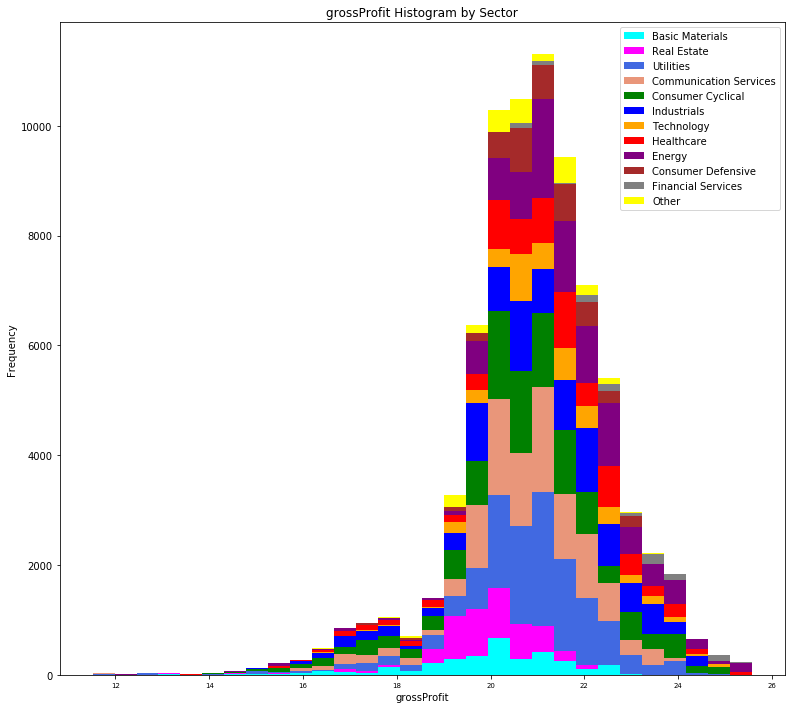

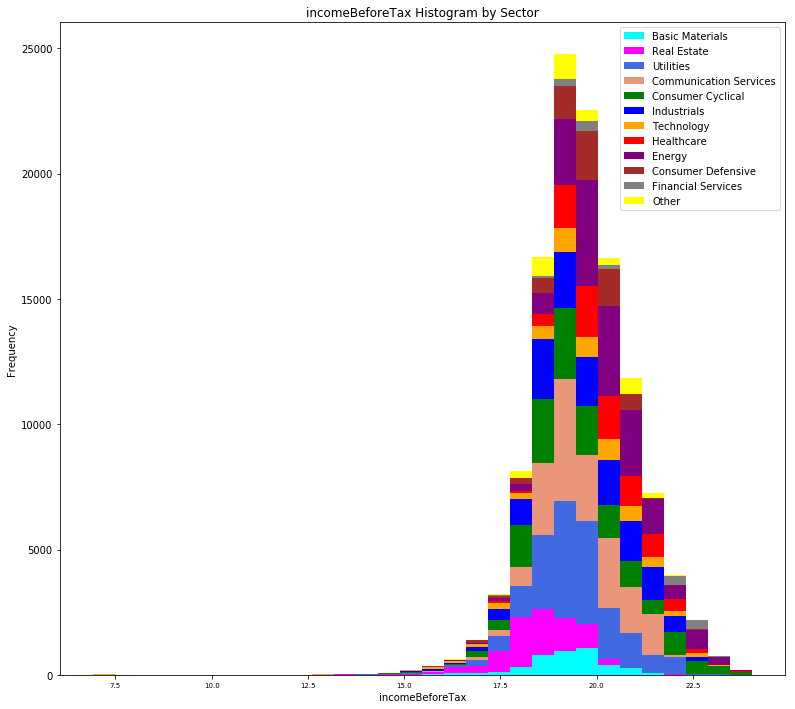

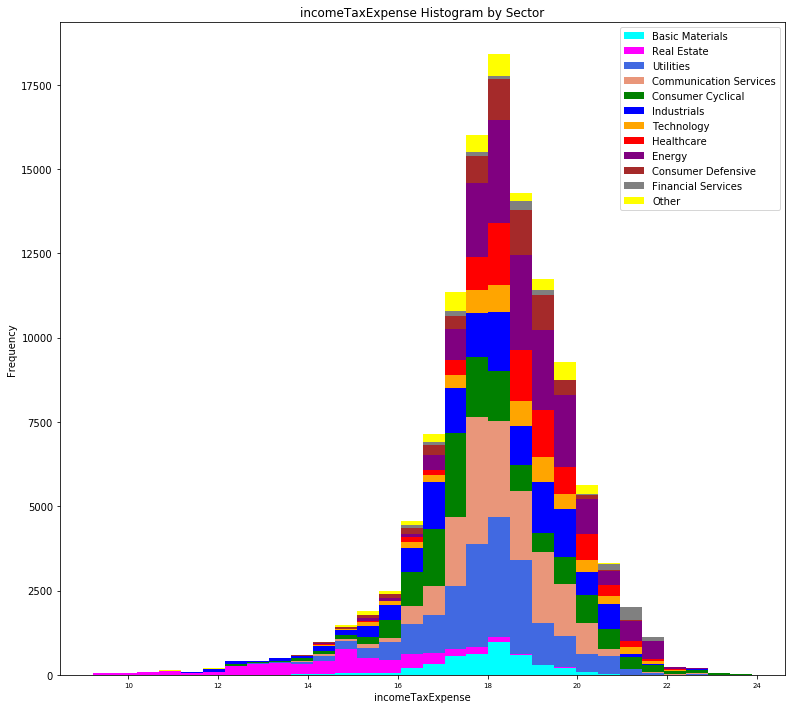

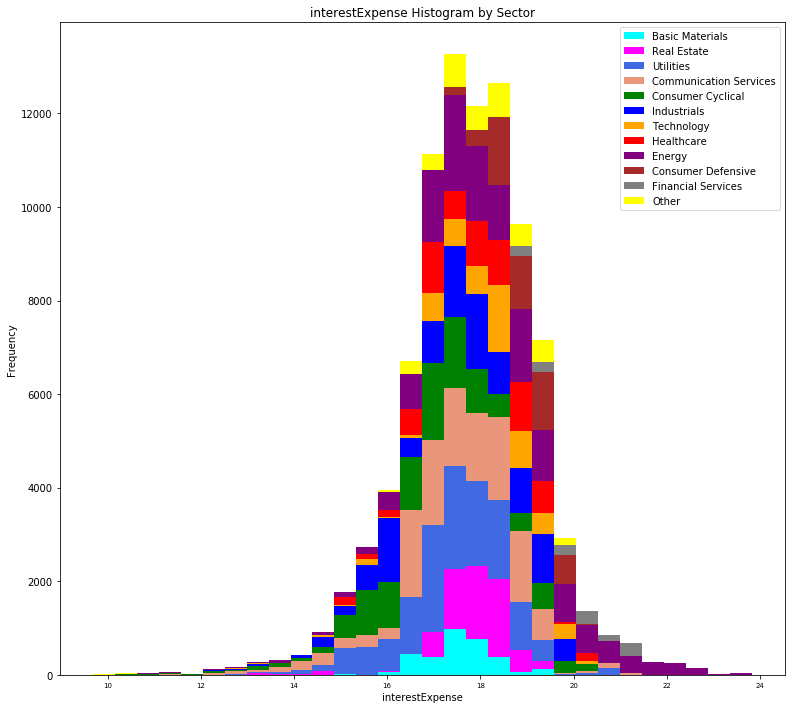

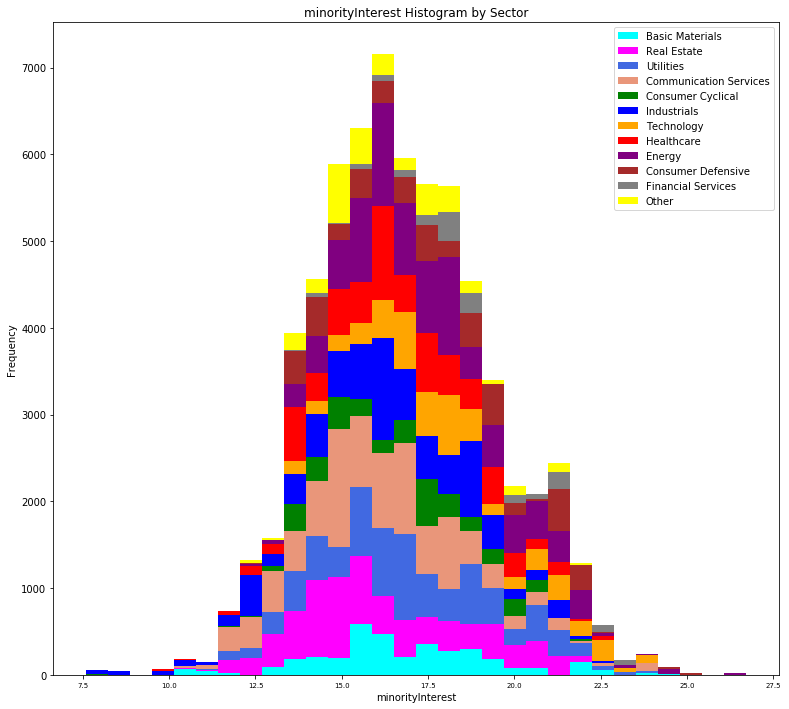

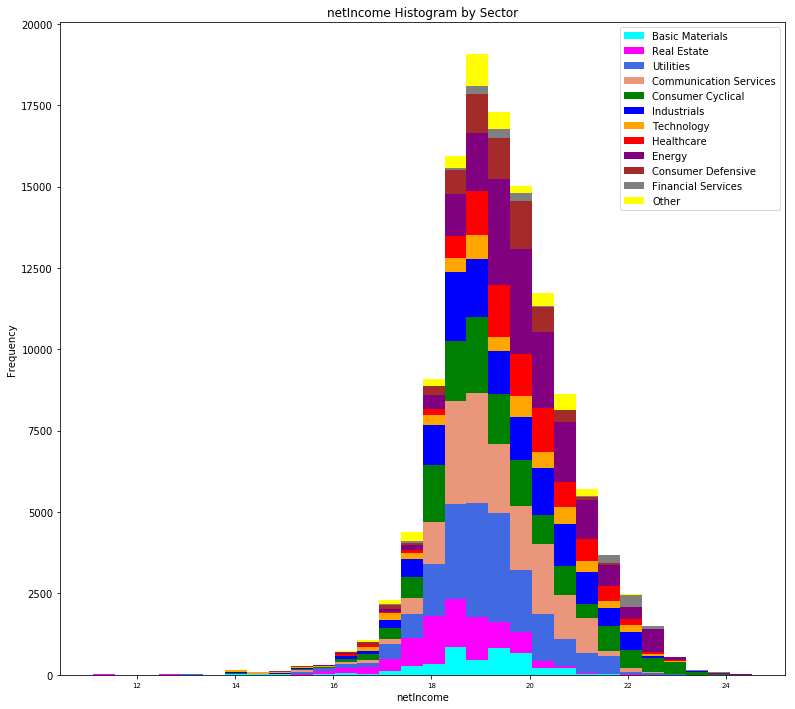

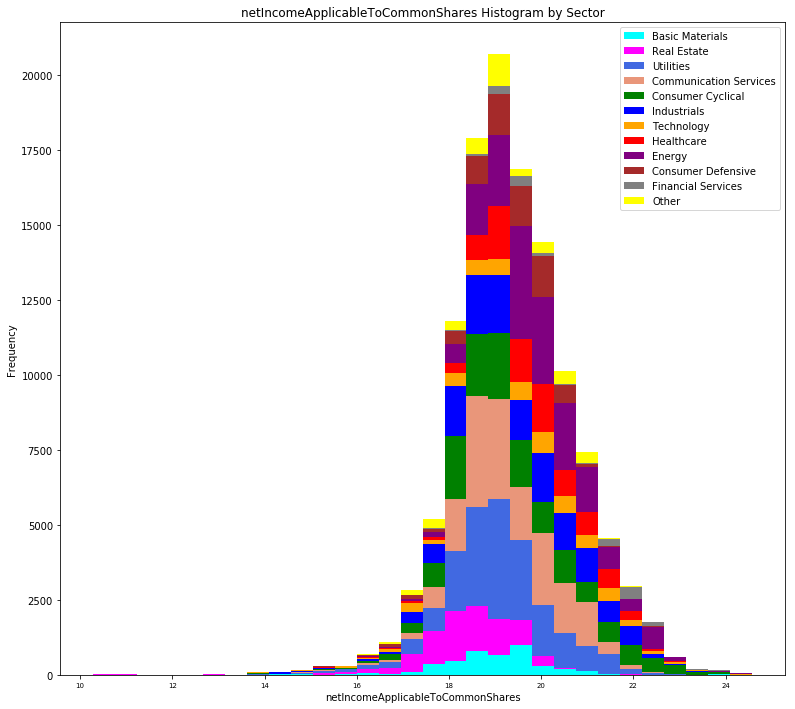

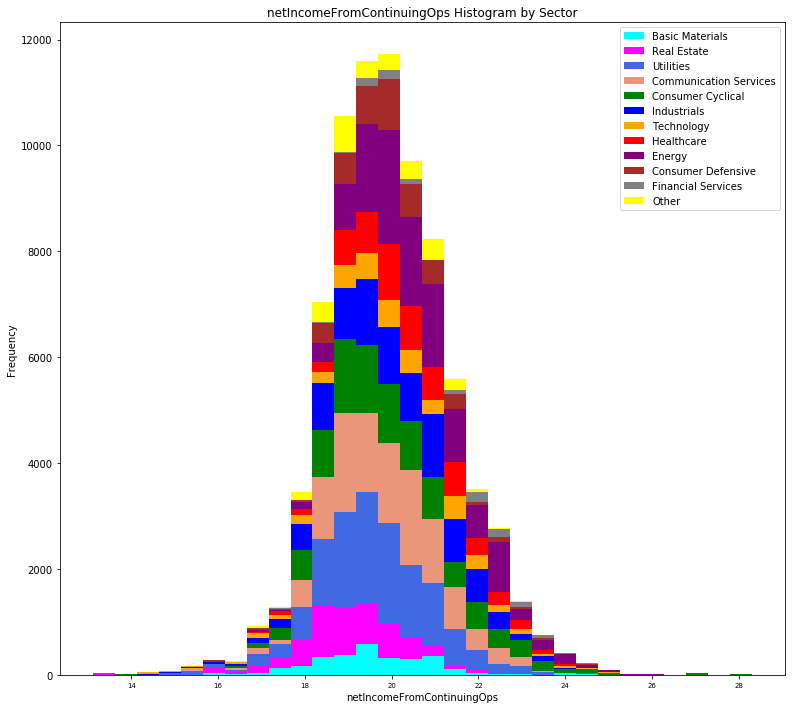

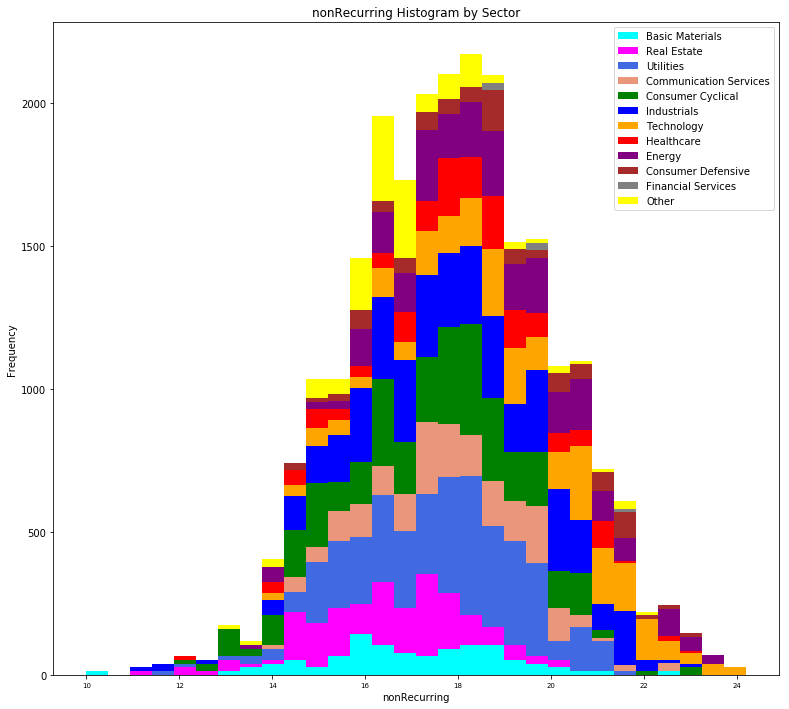

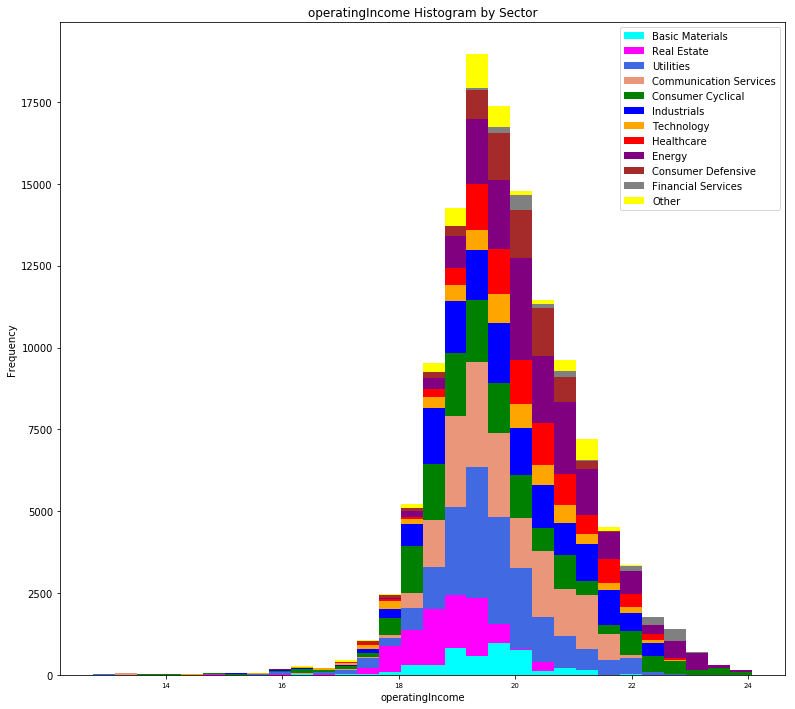

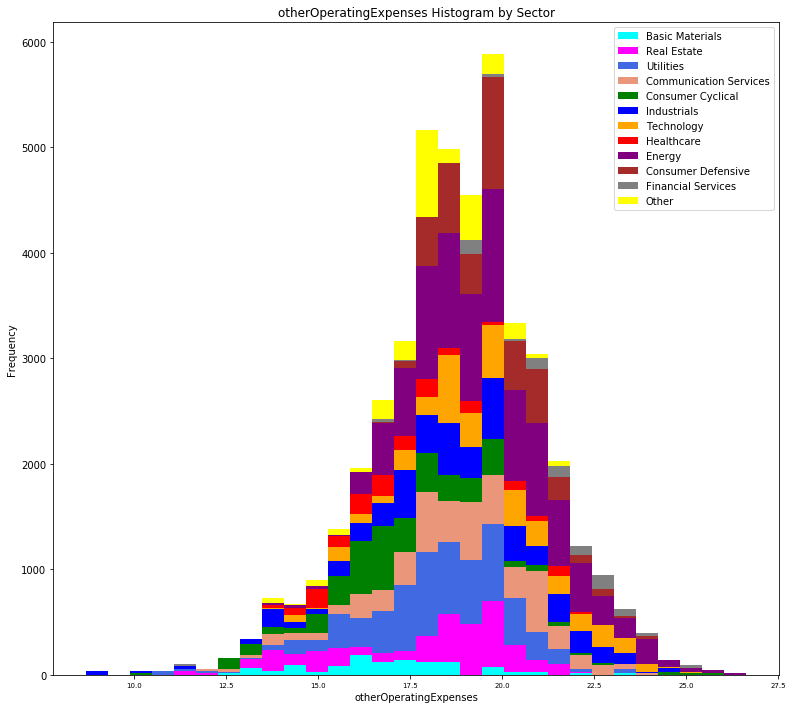

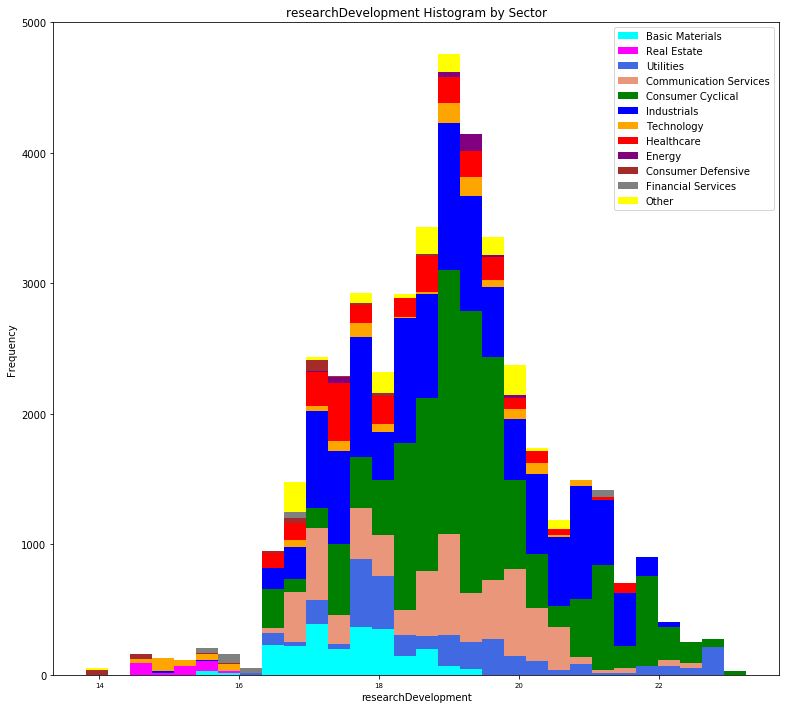

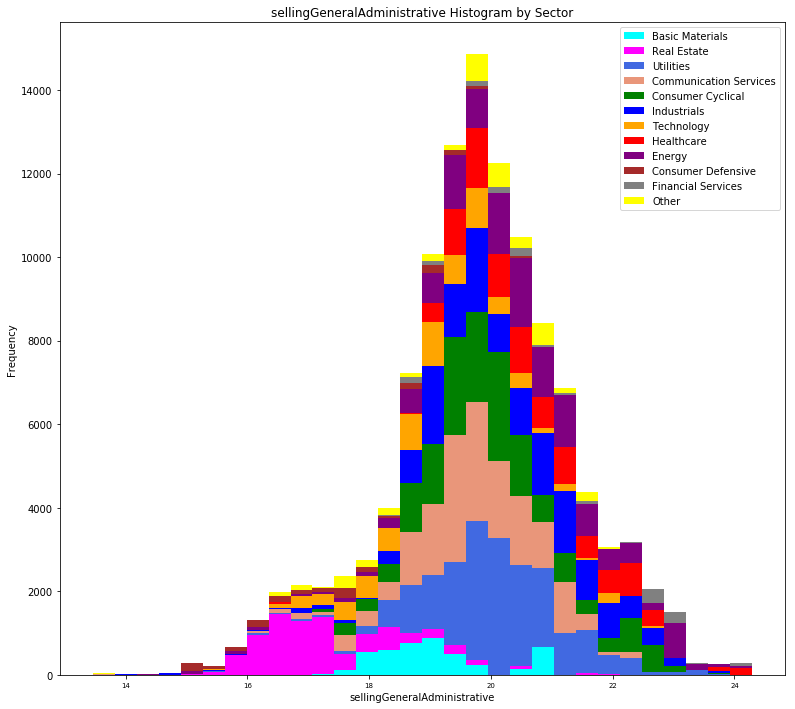

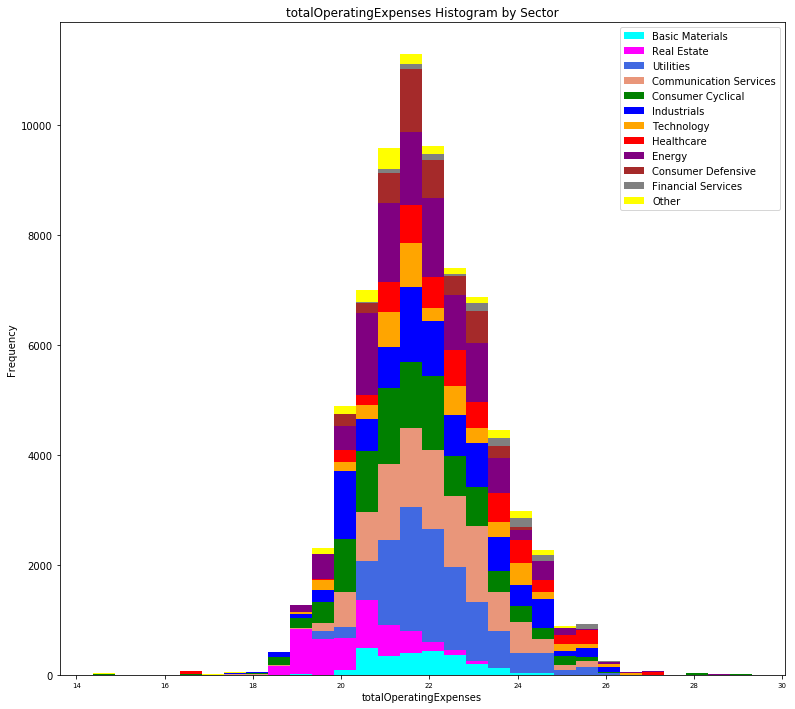

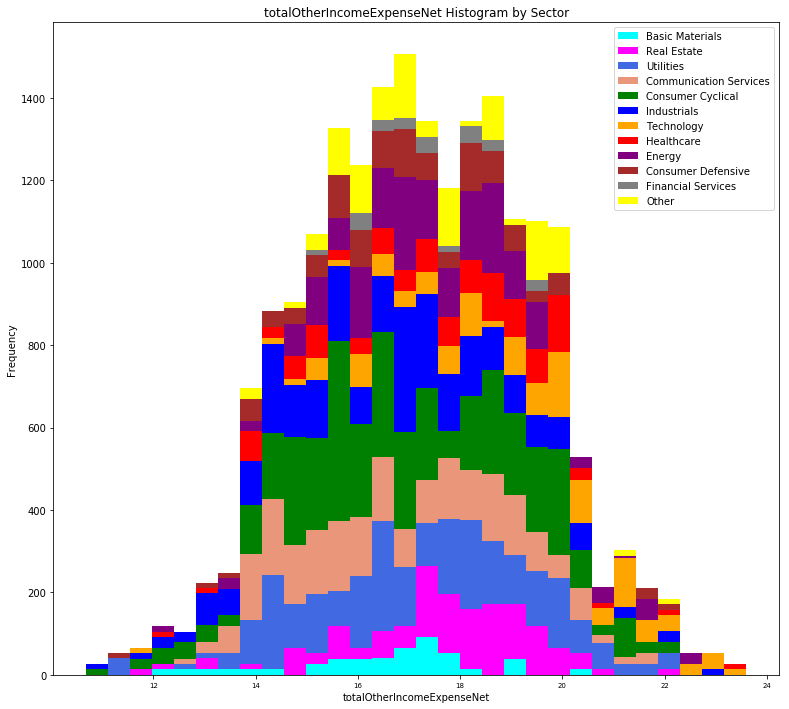

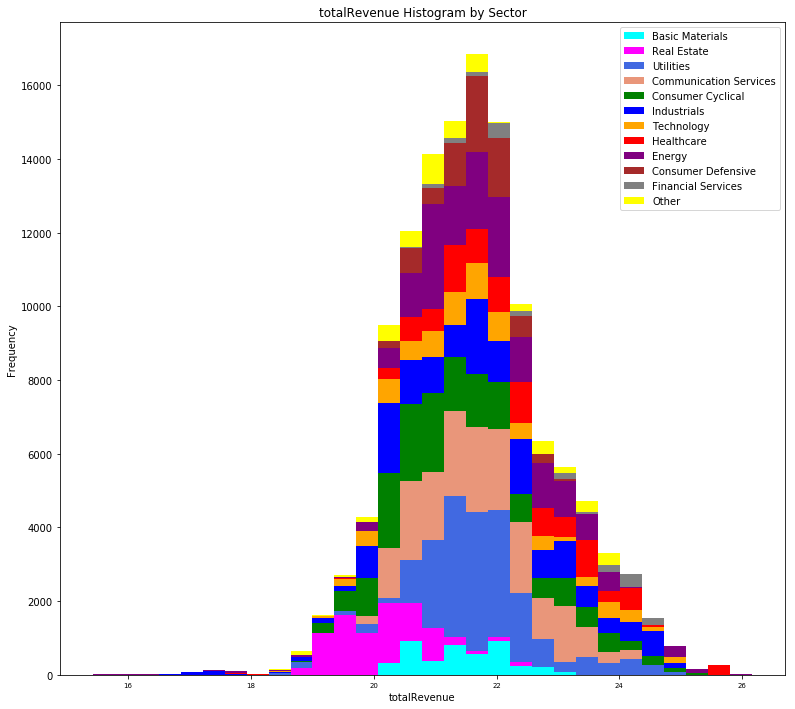

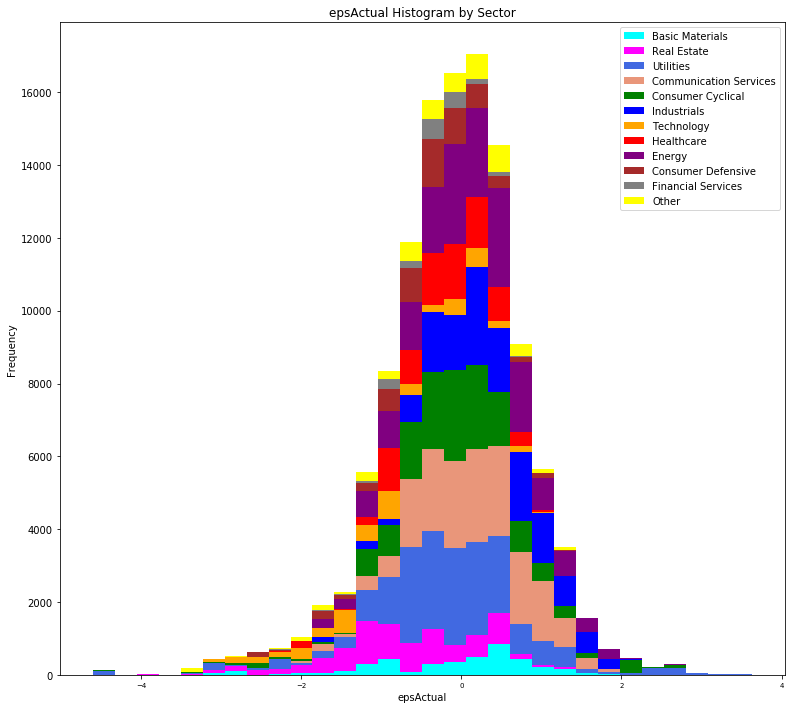

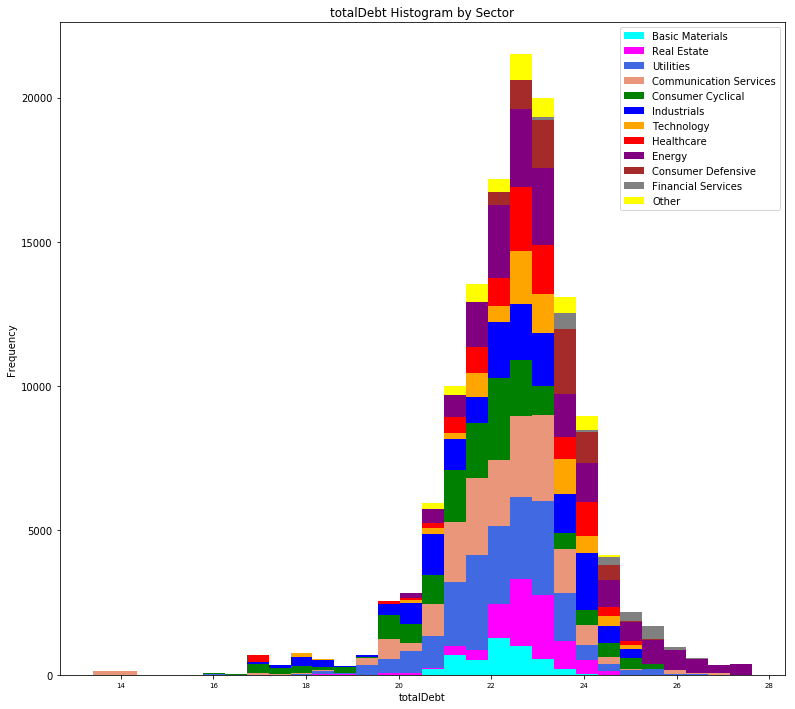

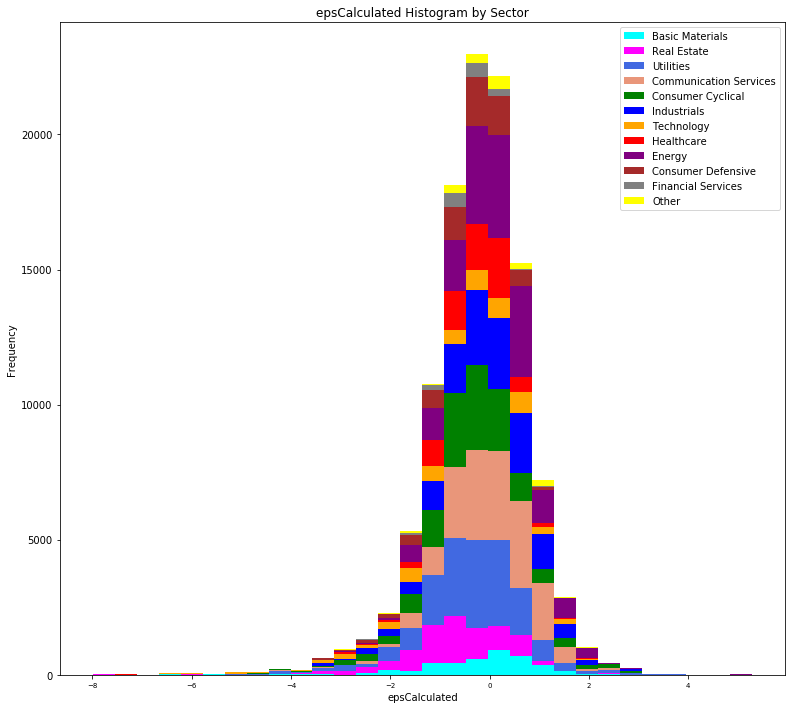

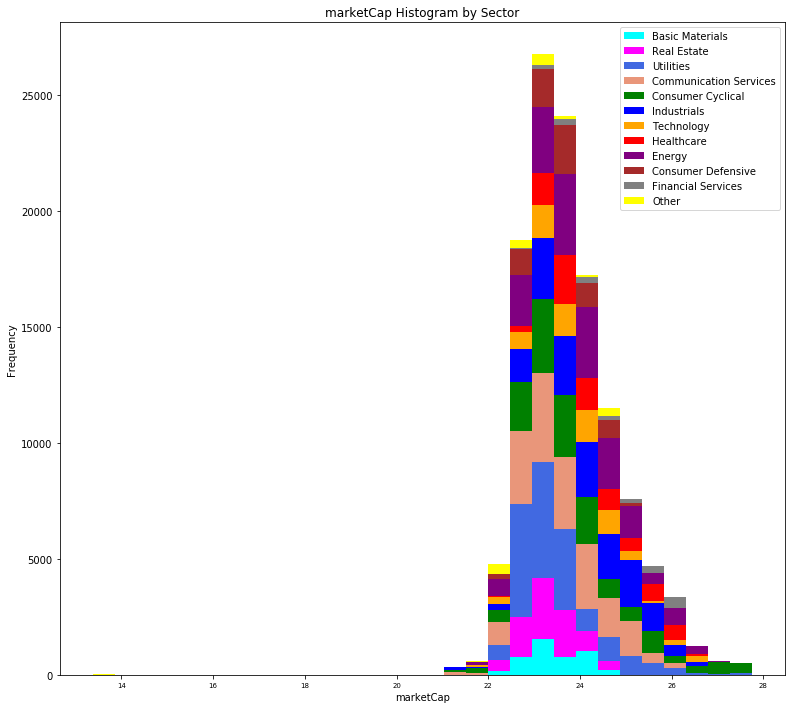

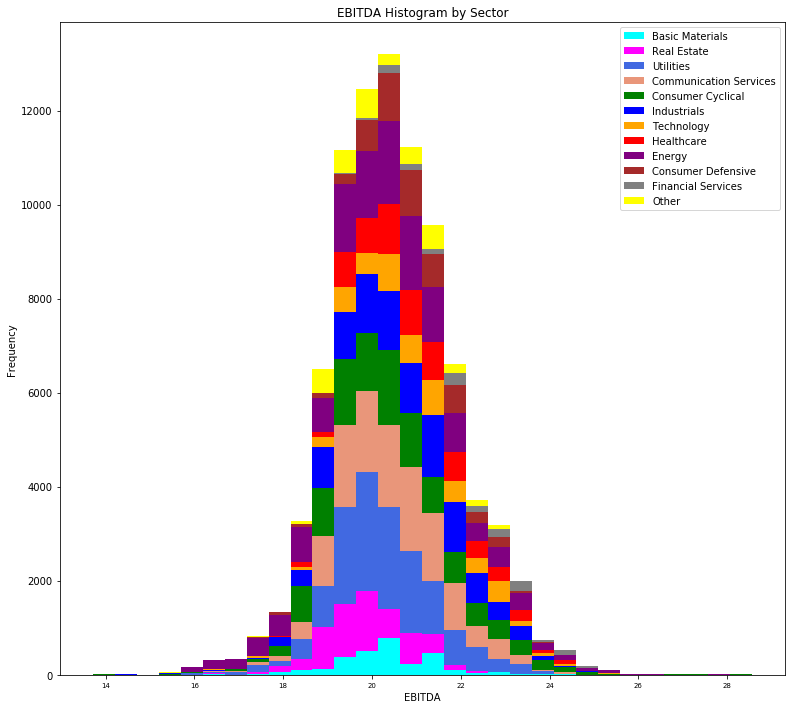

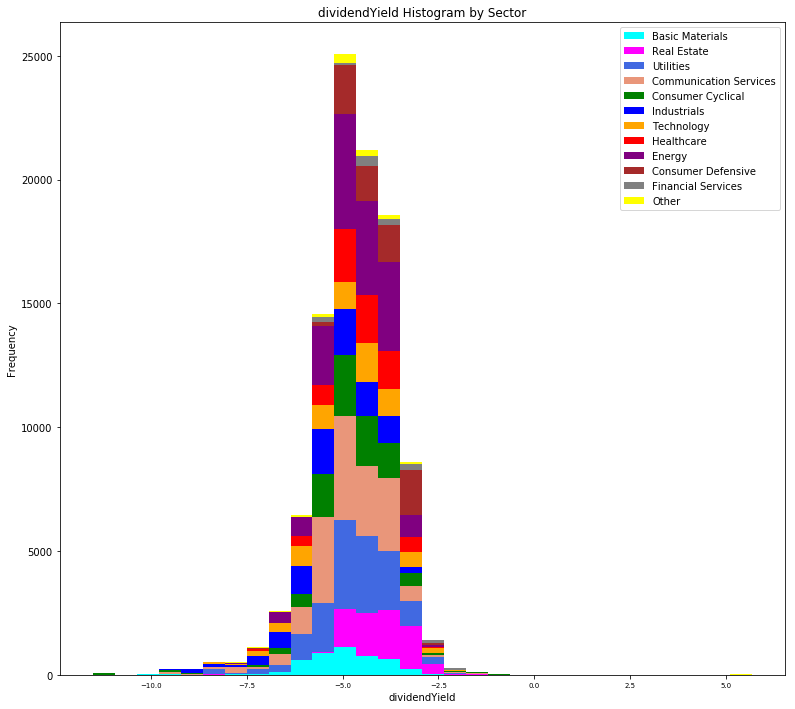

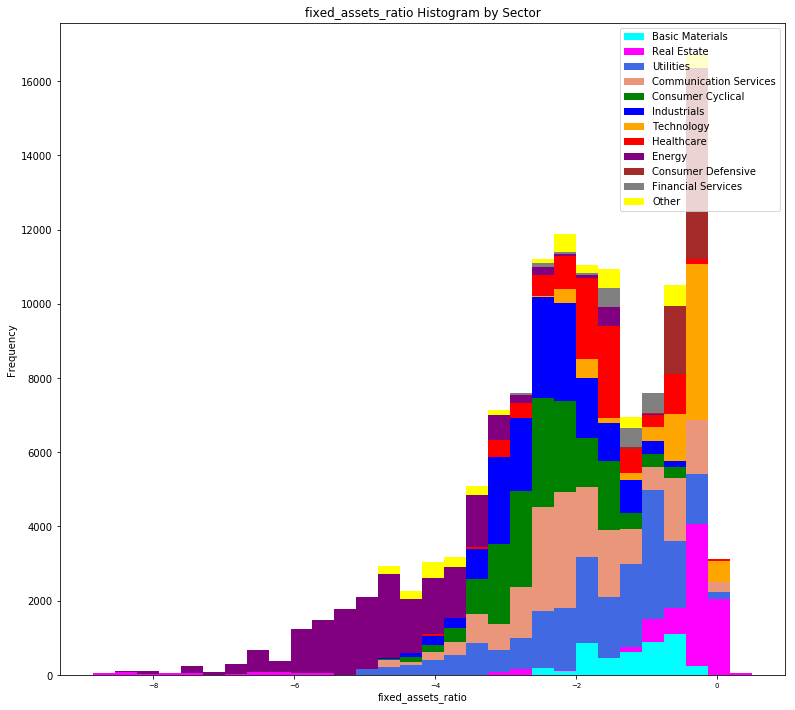

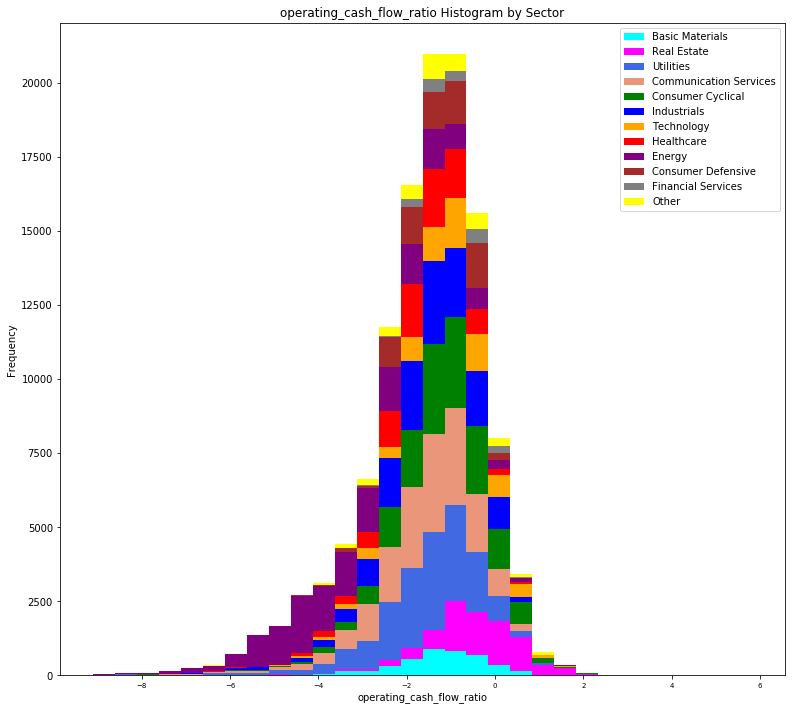

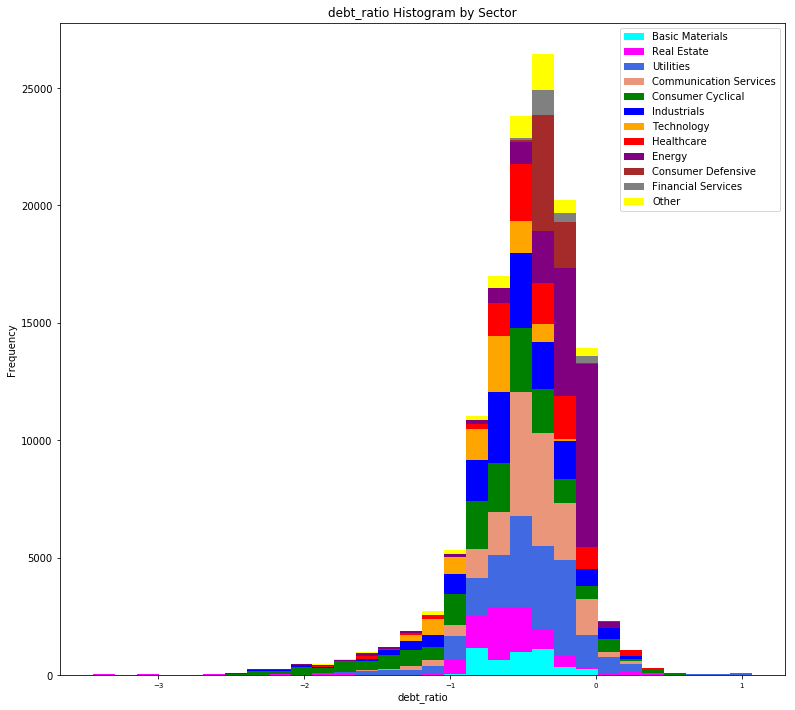

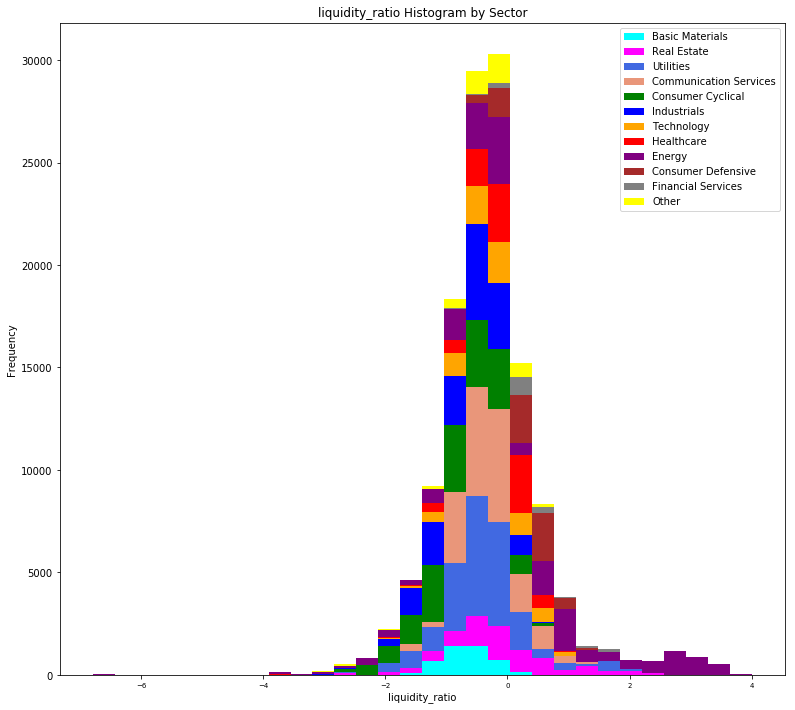

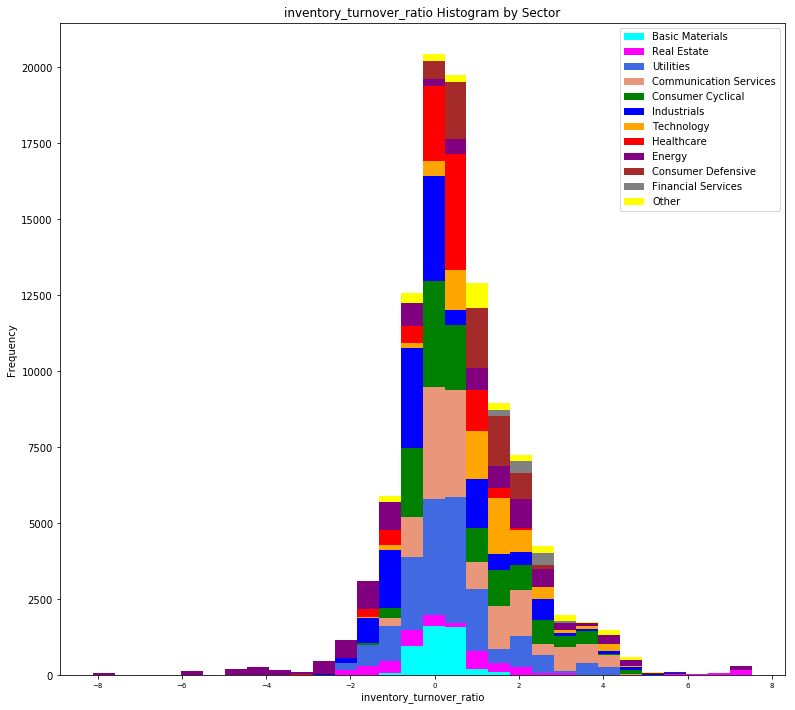

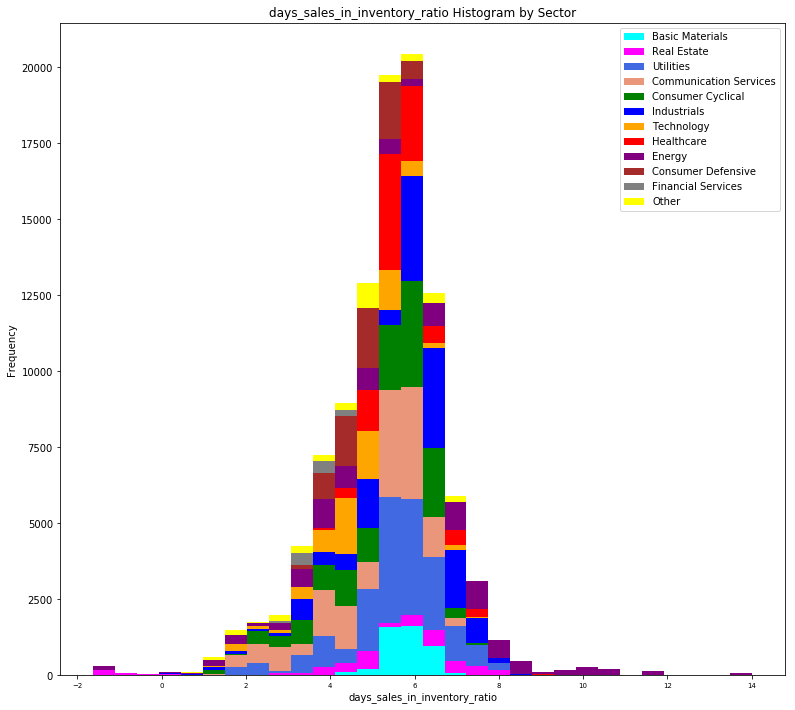

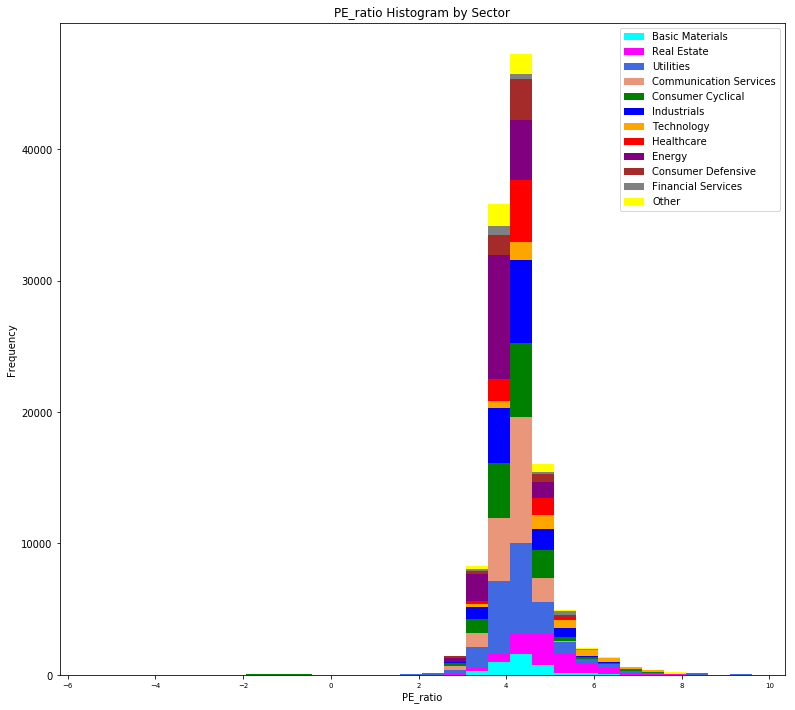

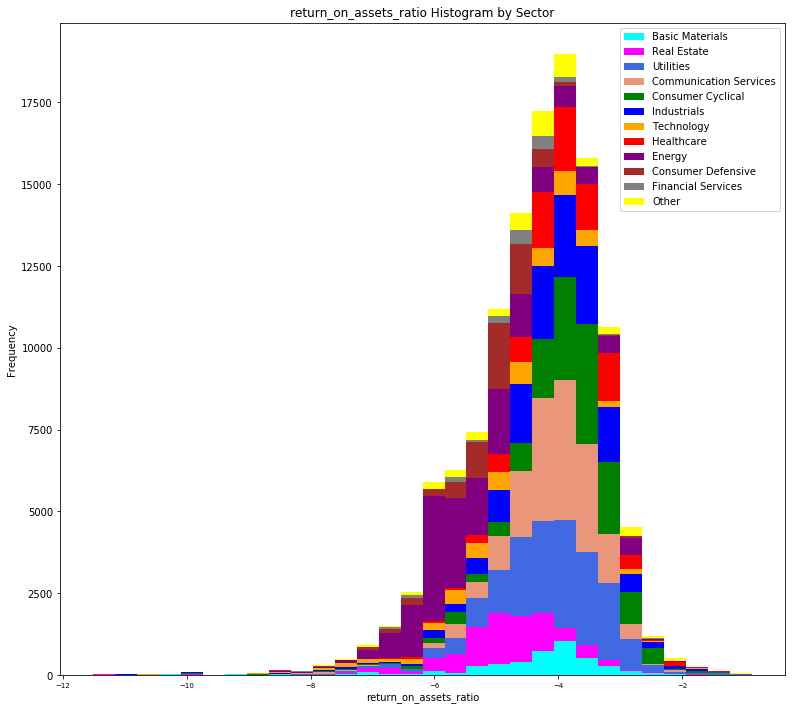

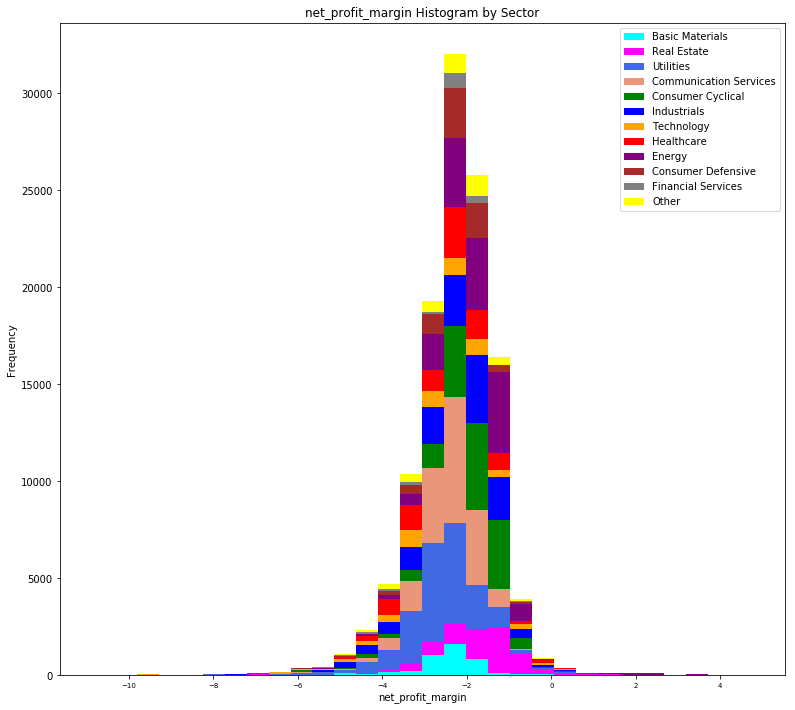

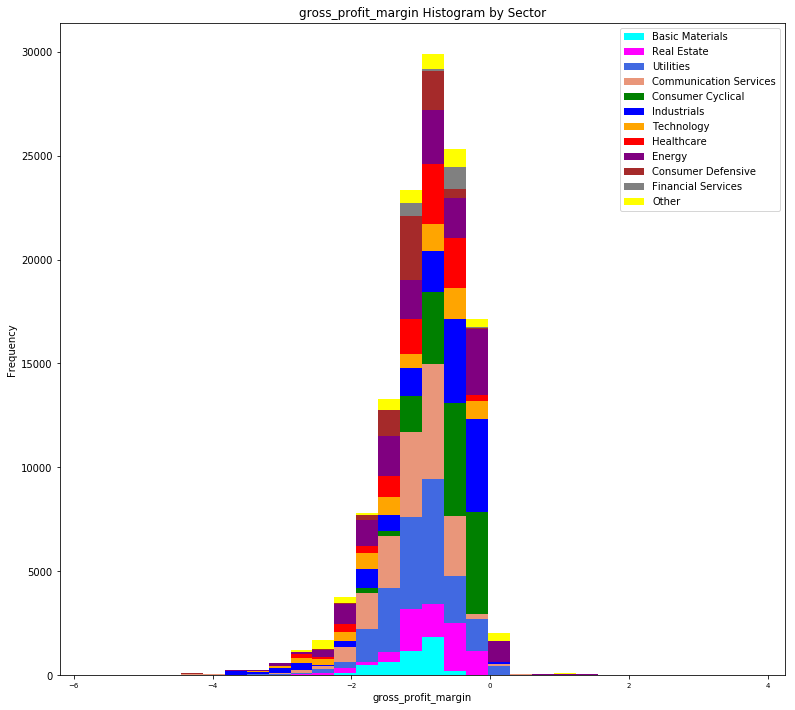

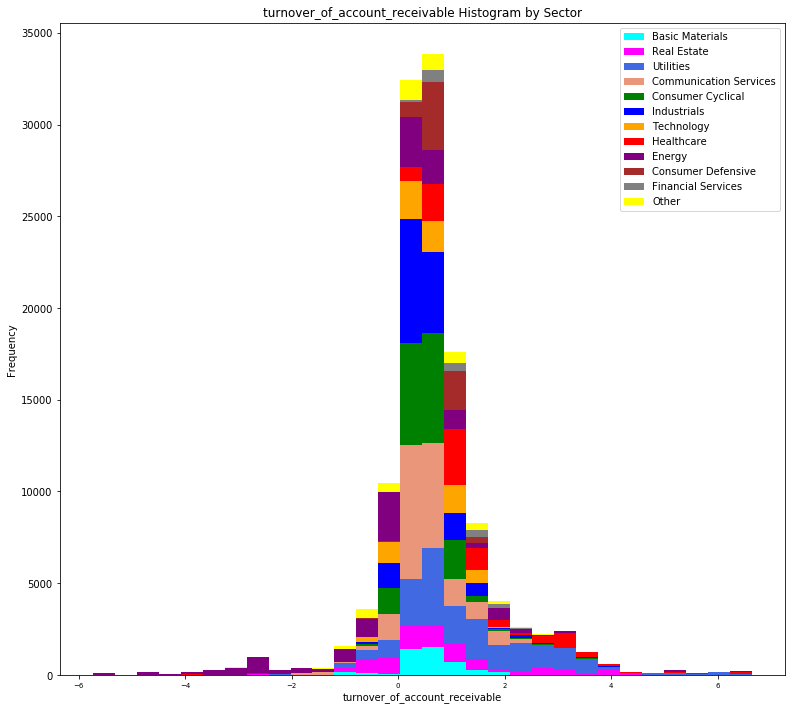

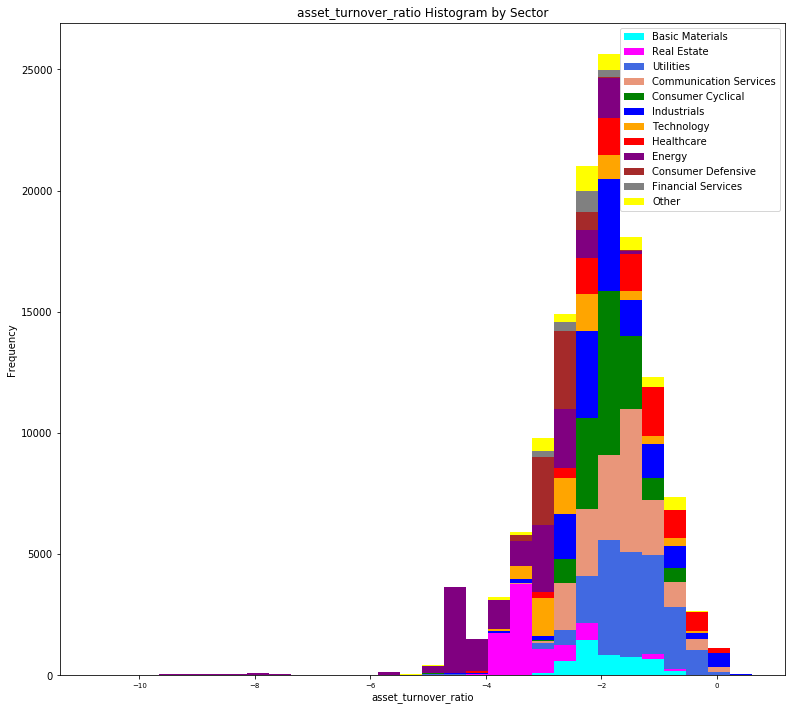

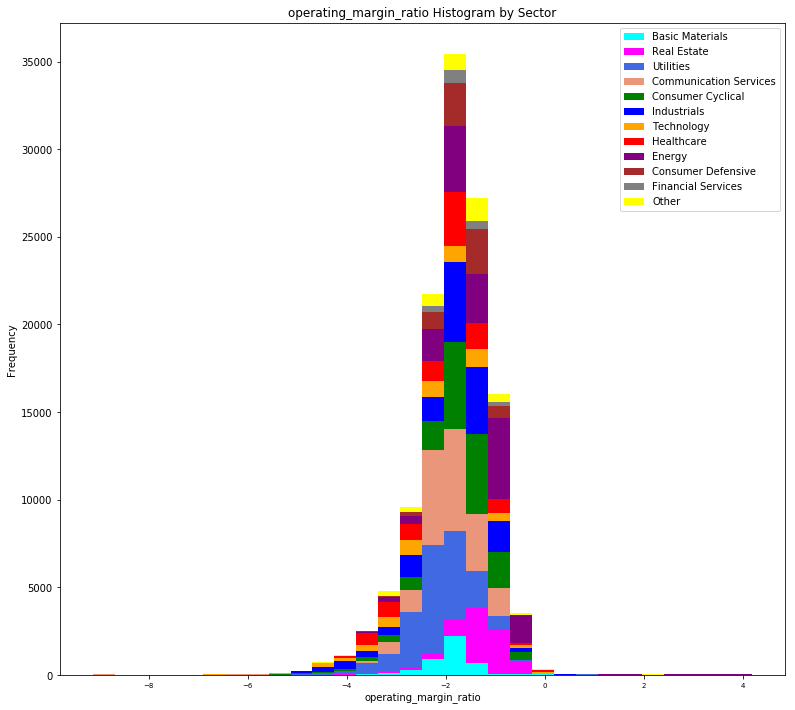

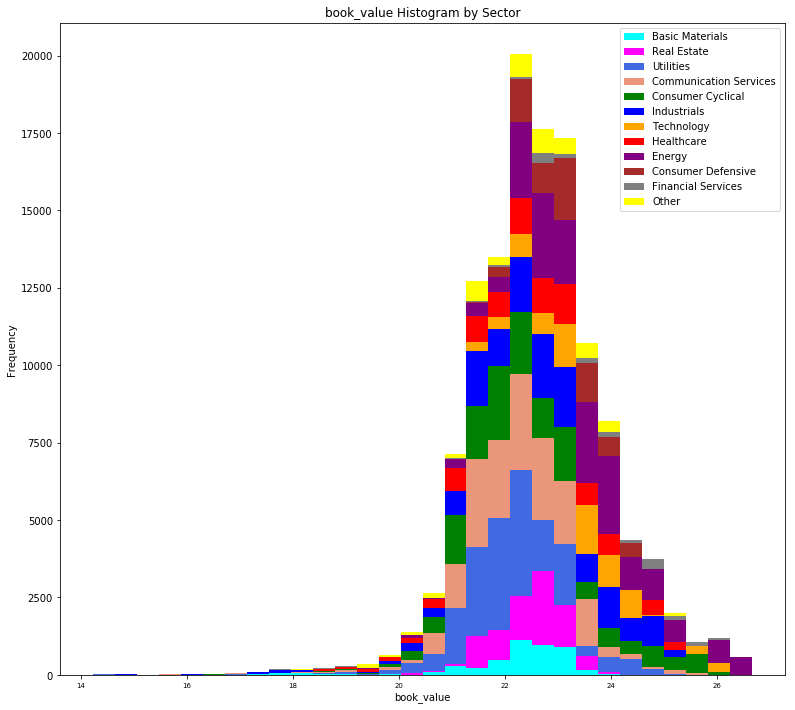

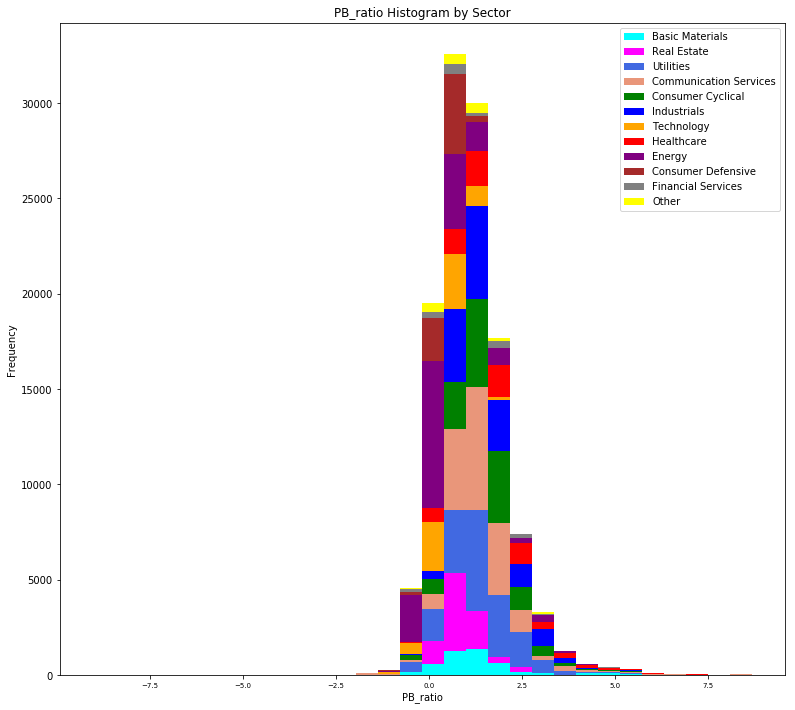

In [20]:
s_graph(list(range(5,99)))